In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

/Users/admin/miniforge3/envs/m1env/lib/python3.8/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/admin/miniforge3/envs/m1env/lib/python3.8/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <CAF361F5-1CAC-3EBE-9FC4-4B823D275CAA> /Users/admin/miniforge3/envs/m1env/lib/python3.8/site-packages/torchvision/image.so
  Reason: tried: '/Users/admin/miniforge3/envs/m1env/lib/python3.8/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/admin/miniforge3/envs/m1env/lib/python3.8/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/admin/miniforge3/envs/m1env/lib/python3.8/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/admin/miniforge3/envs/m1env/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wr

In [2]:
# Seed
torch.manual_seed(0)
np.random.seed(0)

# MNIST DATASET

In [3]:
# Data Loading
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../data', train=False, download=True, transform=transform)

# split train dataset for train and validation
train_set, val_set = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Filter out zeros from training data
train_data = []
train_labels = []
for data, label in train_dataset:
    if label != 0:
        train_data.append(data.view(-1))
        train_labels.append(label)

# Keep all training data
train_data = torch.stack(train_data)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

# Keep all validation data
val_data = torch.stack([data.view(-1) for data, _ in val_set])
val_labels = torch.tensor([label for _, label in val_set])
val_loader = DataLoader(TensorDataset(val_data, val_labels), batch_size=128)

# Keep all test data
test_data = torch.stack([data.view(-1) for data, _ in test_dataset])
test_labels = torch.tensor([label for _, label in test_dataset])
test_loader = DataLoader(TensorDataset(test_data, test_labels), batch_size=128)


In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
val_data.shape

torch.Size([10000, 784])

In [6]:
print(torch.unique(torch.tensor(val_labels), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1057, 1099,  949,  992,  989,  930,  985, 1084,  955,  960]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/435634570.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/435634570.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


## Preparing validation set

In [7]:
# ------------------- -------------------
# Decrease amount of 1-9 digits in validation data set to 1/9 of its current amount
# ------------------- -------------------

indices_1_9 = (val_labels != 0).nonzero(as_tuple=True)[0]
indices_1_9 = val_labels != 0
indices_0 = val_labels == 0

print(len(val_data[indices_0]))
print(len(val_data[indices_1_9]))

# Randomly choose 1000 examples from val_data[indices_1_9]
num_samples = 1000
random_indices = torch.randperm(len(val_data[indices_1_9]))[:num_samples]
val_data_reduced = val_data[indices_1_9][random_indices]
val_labels_reduced = val_labels[indices_1_9][random_indices]

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

val_data_reduced = torch.cat((val_data_reduced, val_data[indices_0]), dim=0)
val_labels_reduced = torch.cat((val_labels_reduced, val_labels[indices_0]), dim=0)

print(len(val_data_reduced))
print(len(val_labels_reduced))

print(torch.unique(val_labels_reduced, return_counts=True))

# Reduced validation data loader
val_loader_reduced = DataLoader(TensorDataset(val_data_reduced, val_labels_reduced), batch_size=128, shuffle=True) # shuffle is optional

1057
8943
1000
1000
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([138, 109, 107, 102,  90, 105, 133, 114, 102]))
2057
2057
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1057,  138,  109,  107,  102,   90,  105,  133,  114,  102]))


In [8]:
print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
print(torch.unique(torch.tensor(test_labels), return_counts=True))
print(torch.unique(torch.tensor(train_labels), return_counts=True))

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1057,  138,  109,  107,  102,   90,  105,  133,  114,  102]))
(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/2262724207.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(val_labels_reduced), return_counts=True))
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/2262724207.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  print(torch.unique(torch.tensor(test_labels), return_counts=True))


# Autoencoders

In [9]:
ALL_MODELS = []

## Autoencoders definitions

In [10]:
# za duzy latent space
# zmniejszyc liczbe neuronow
# weight decay mozna zmniejszyc
# oslabic architekture
# czasami ciezko jest zredukowac blad, bo model sie nauczy, zeby zwracac to samo co wejscie

# Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Autoencoder Model with 16 latent space
class Autoencoder_16(nn.Module):
    def __init__(self):
        super(Autoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# Autoencoder Model with 8 latent space
class Autoencoder_8(nn.Module):
    def __init__(self):
        super(Autoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# BigAutoencoder Model
class BigAutoencoder(nn.Module):
    def __init__(self):
        super(BigAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# BigAutoencoder Model
class BigAutoencoder_16(nn.Module):
    def __init__(self):
        super(BigAutoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
class BigAutoencoder_8(nn.Module):
    def __init__(self):
        super(BigAutoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# SmallAutoencoder Model
class SmallAutoencoder(nn.Module):
    def __init__(self):
        super(SmallAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
# SmallAutoencoder Model with 16 latent space
class SmallAutoencoder_16(nn.Module):
    def __init__(self):
        super(SmallAutoencoder_16, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# SmallAutoencoder Model with 8 latent space
class SmallAutoencoder_8(nn.Module):
    def __init__(self):
        super(SmallAutoencoder_8, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



## SmallAutoencoder model

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/15], Train_loss: 0.0361, Val_loss: 0.0262
Model nr 0. Epoch [2/15], Train_loss: 0.0218, Val_loss: 0.0218
Model nr 0. Epoch [3/15], Train_loss: 0.0192, Val_loss: 0.0197
Model nr 0. Epoch [4/15], Train_loss: 0.0175, Val_loss: 0.0184
Model nr 0. Epoch [5/15], Train_loss: 0.0165, Val_loss: 0.0174
Model nr 0. Epoch [6/15], Train_loss: 0.0158, Val_loss: 0.0169
Model nr 0. Epoch [7/15], Train_loss: 0.0153, Val_loss: 0.0164
Model nr 0. Epoch [8/15], Train_loss: 0.0149, Val_loss: 0.0160
Model nr 0. Epoch [9/15], Train_loss: 0.0145, Val_loss: 0.0158
Model nr 0. Epoch [10/15], Train_loss: 0.0142, Val_loss: 0.0153
Model nr 0. Epoch [11/15], Train_loss: 0.0139, Val_loss: 0.0150
Model nr 0. Epoch [12/15], Train_loss: 0.0137, Val_loss: 0.0148
Model nr 0. Epoch [13/15], Train_loss: 0.0135, Val_loss: 0.0147
Model nr 0. Epoch [14/15], Train_loss: 0.0133, Val_loss: 0.0146
Model nr 0. Epoch [15/15], Train_loss: 0.0132, Val_loss: 0.0144
Model nr 1. Epoch [1/15

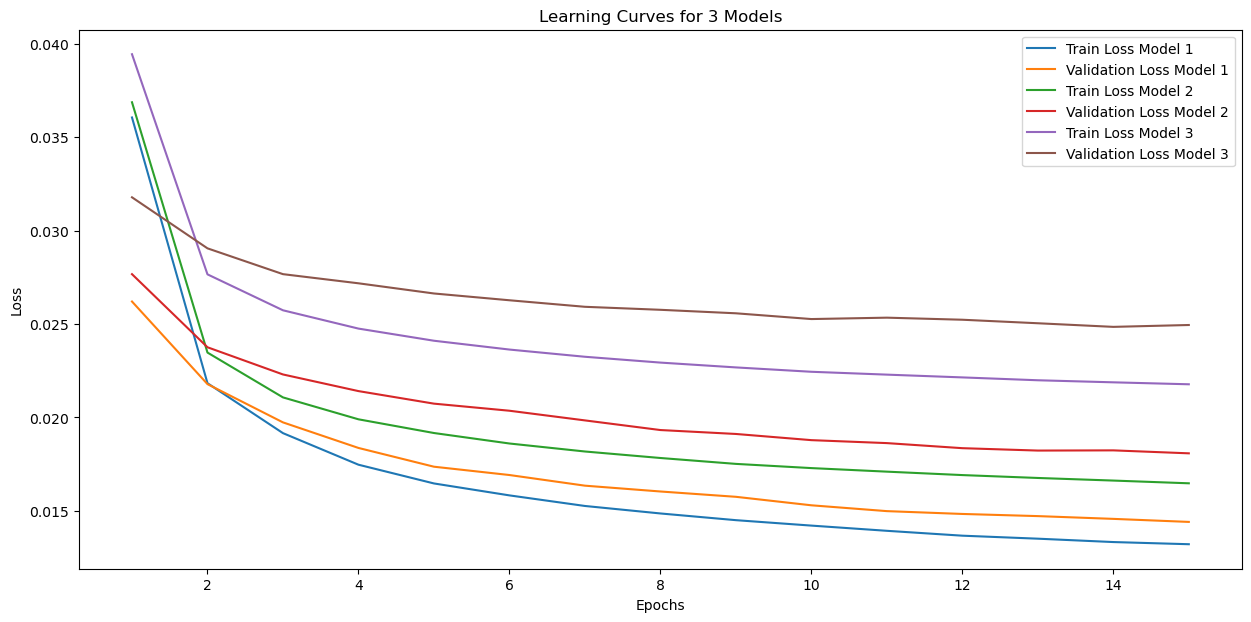

In [11]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = SmallAutoencoder()
model_2 = SmallAutoencoder_16()
model_3 = SmallAutoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 15
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# adding models to list
ALL_MODELS.append(models)

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()

In [12]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == 0
    # indices of other digits
    other_indices = sorted_labels_indices != 0
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')
    print(f'Model nr {idx}. F1 Score at Best Threshold: {f1_scores[idx][best_threshold_index]:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)

Model nr 0. Best Threshold: 0.3684
Model nr 0. Precision at Best Threshold: 0.7213
Model nr 0. Recall at Best Threshold: 0.8865
Model nr 0. F1 Score at Best Threshold: 0.7954
Model nr 1. Best Threshold: 0.4211
Model nr 1. Precision at Best Threshold: 0.7951
Model nr 1. Recall at Best Threshold: 0.8959
Model nr 1. F1 Score at Best Threshold: 0.8425
Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.9067
Model nr 2. Recall at Best Threshold: 0.9290
Model nr 2. F1 Score at Best Threshold: 0.9178


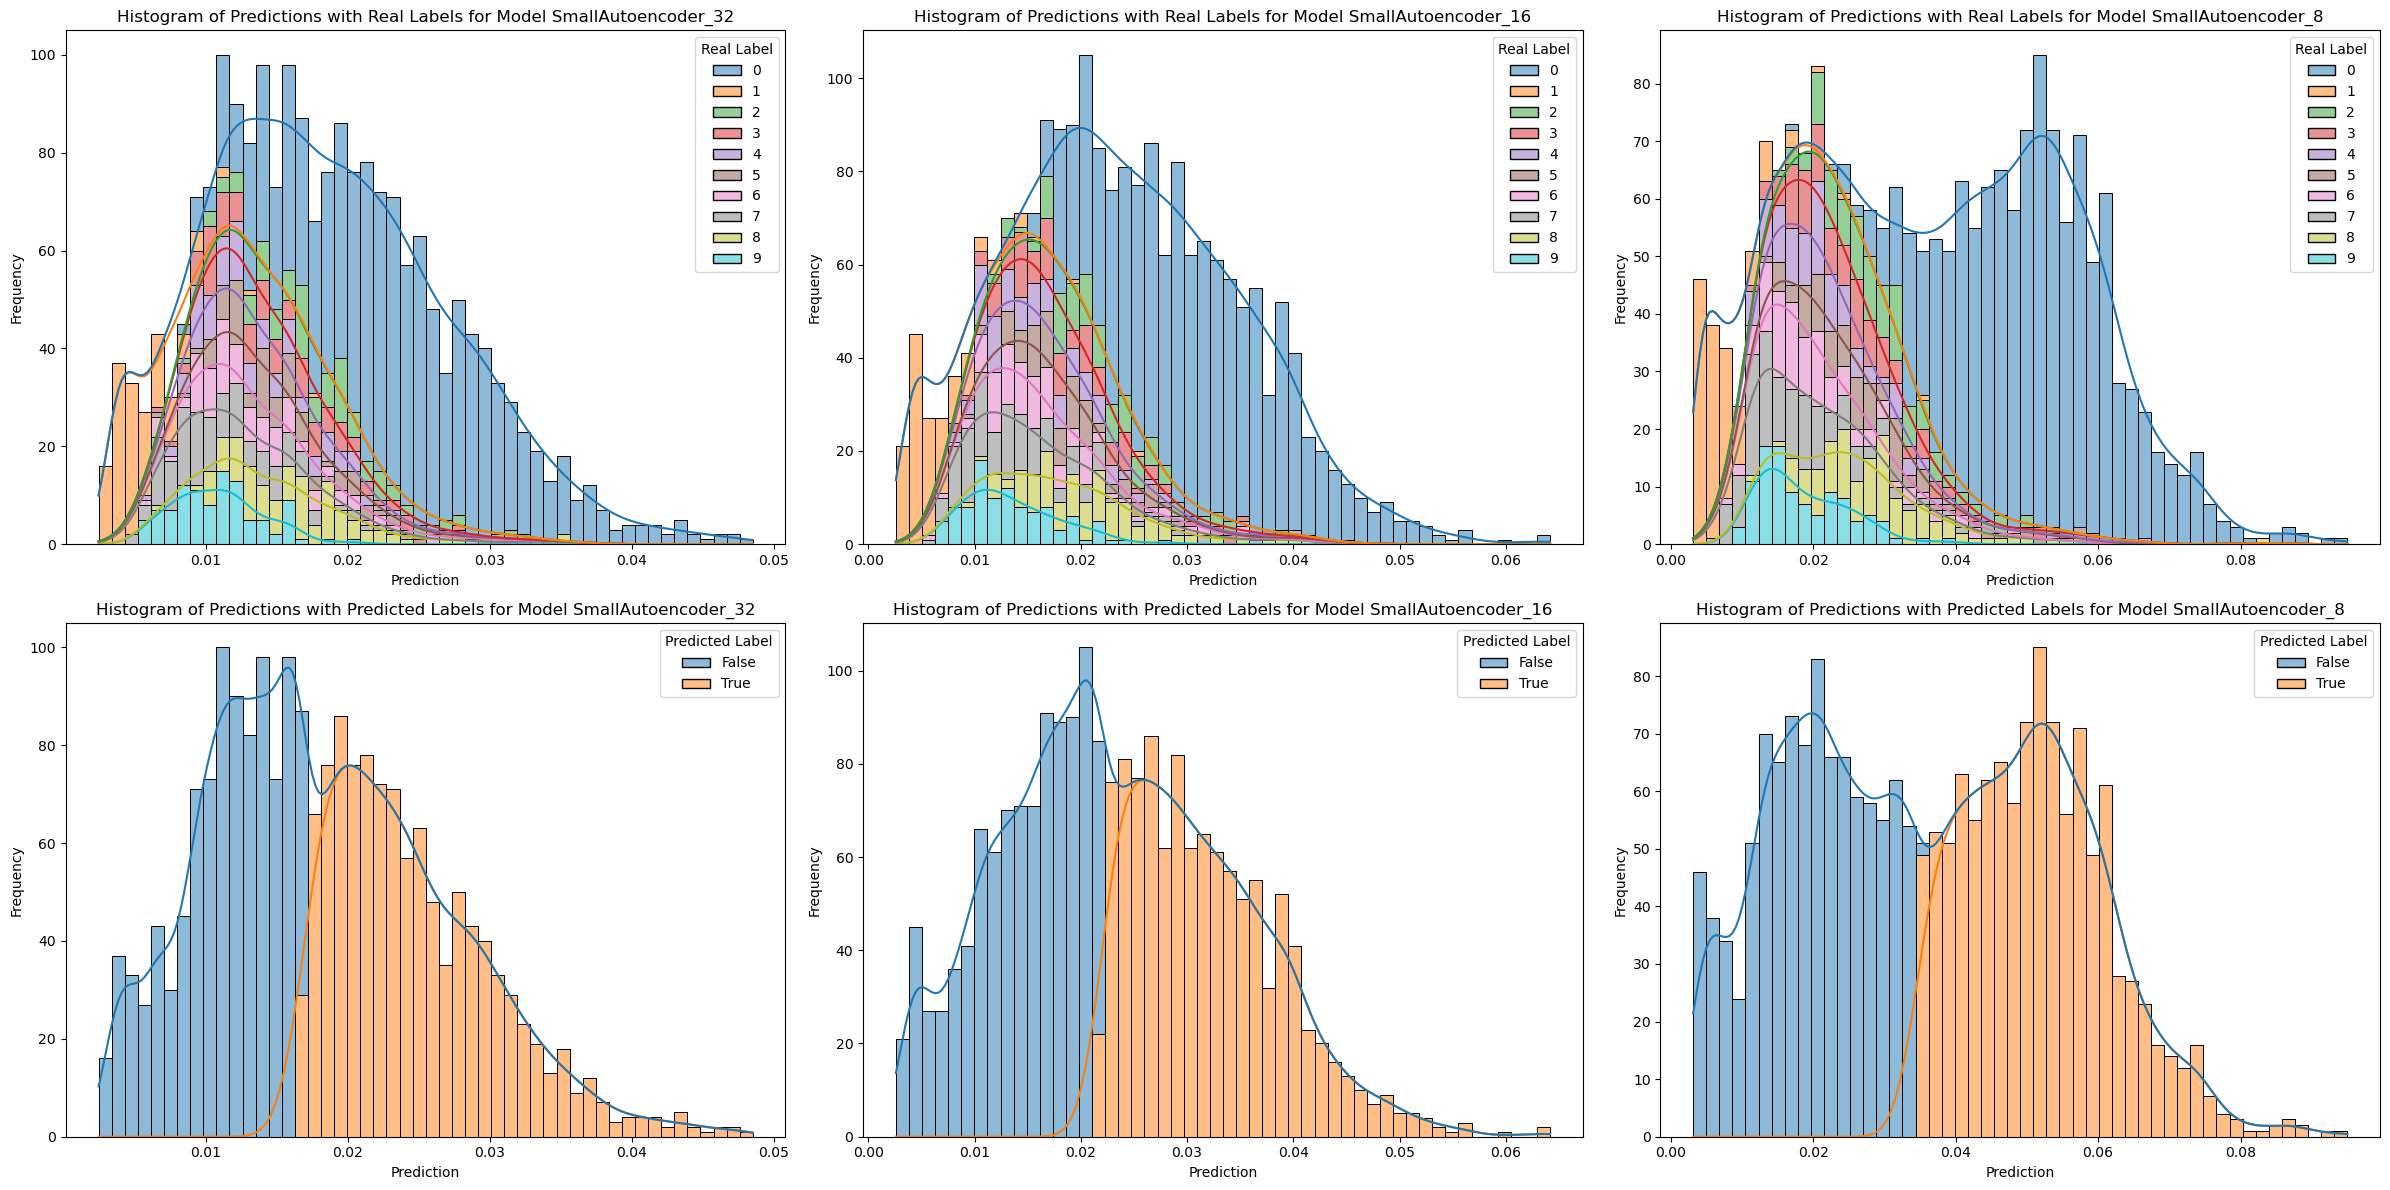

In [13]:
import seaborn as sns
import pandas as pd

names = {
    0: 'SmallAutoencoder_32',
    1: 'SmallAutoencoder_16',
    2: 'SmallAutoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

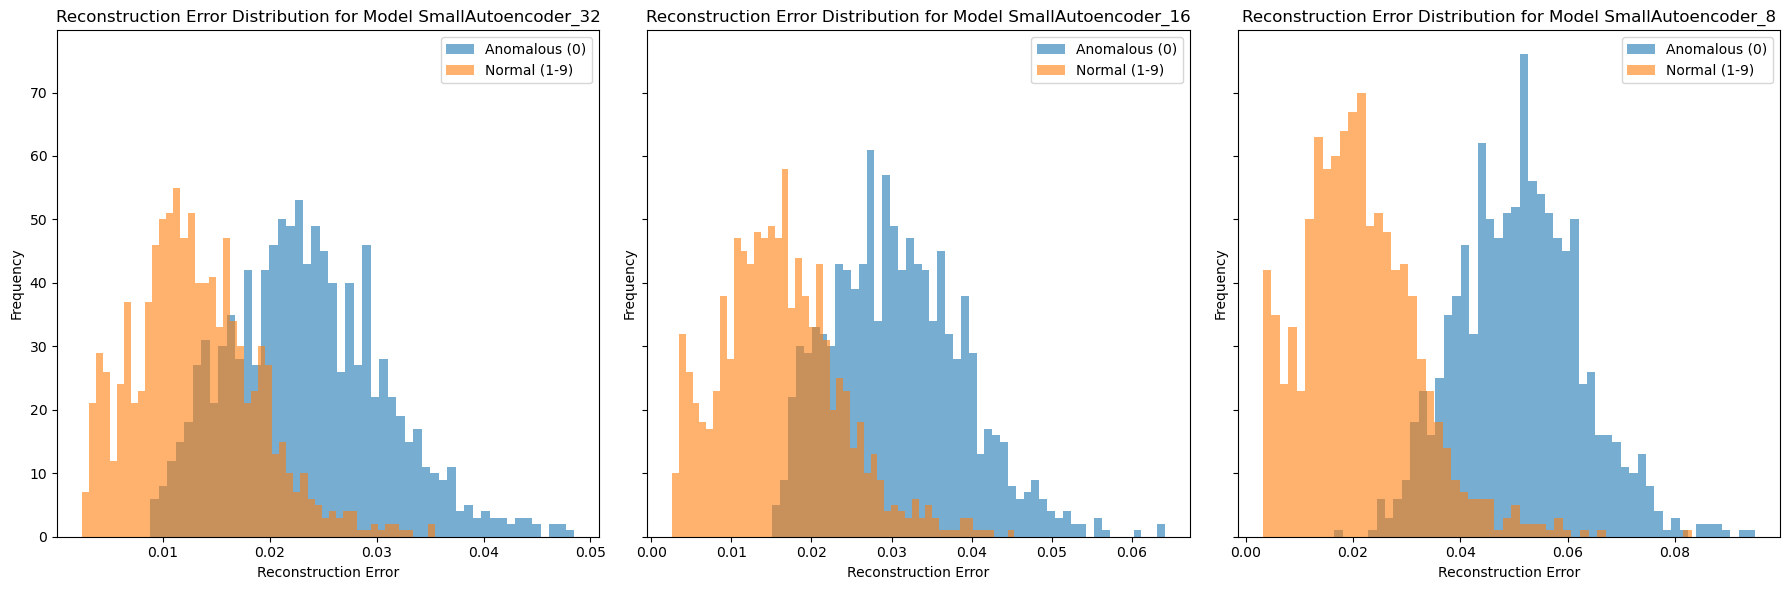

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [15]:
# # Function to calculate reconstruction loss
# def calculate_reconstruction_loss(data, model):
#     reconstructions = model(data)
#     reconstruction_errors = torch.mean(torch.abs(data - reconstructions), axis=1)
#     return reconstruction_errors

# # Calculate reconstruction loss for normal and anomalous images
# for i in range(10):
#     anomalous_images = test_data[test_labels == i]
#     anomalous_images_tensor = torch.tensor(anomalous_images, dtype=torch.float32).to(device)
#     reconstruction_loss_anomalous = calculate_reconstruction_loss(anomalous_images_tensor, model)
#     print(f"Anomalous images of number {i}: {reconstruction_loss_anomalous.mean()}")


# reconstruction_loss_normal = calculate_reconstruction_loss(next(iter(test_loader))[0].to(device), model)
# print(f"Normal images: {reconstruction_loss_normal.mean()}")


In [16]:
# # Reconstruct images from test_loader and plot those with the biggest loss
# import matplotlib.pyplot as plt

# # Get a batch of test data
# test_images, _ = next(iter(test_loader))
# test_images = test_images.to(device)

# # Calculate reconstruction loss for the batch
# reconstruction_losses = calculate_reconstruction_loss(test_images, model)
# print(reconstruction_losses)

# # Get indices of images with the biggest loss
# num_images_to_plot = 5
# _, indices = torch.topk(reconstruction_losses, num_images_to_plot)

# print(reconstruction_losses[indices])

# # Plot the original and reconstructed images with the biggest loss
# fig, axes = plt.subplots(num_images_to_plot, 2, figsize=(10, 10))

# for i, idx in enumerate(indices):
#     original_image = test_images[idx].cpu().view(28, 28).detach().numpy()
#     reconstructed_image = model(test_images[idx].unsqueeze(0)).cpu().view(28, 28).detach().numpy()

#     axes[i, 0].imshow(original_image, cmap='gray')
#     axes[i, 0].set_title(f'Original Image {i+1}')
#     axes[i, 0].axis('off')

#     axes[i, 1].imshow(reconstructed_image, cmap='gray')
#     axes[i, 1].set_title(f'Reconstructed Image {i+1}')
#     axes[i, 1].axis('off')

# plt.tight_layout()
# plt.show()

In [17]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Get predictions and actual labels
# predictions = []
# actual = []

# model.eval()
# with torch.no_grad():
#     for data, labels in test_loader:
#         data = data.to(device)
#         outputs = model(data)
#         reconstruction_errors = torch.mean(torch.abs(data - outputs), axis=1)
#         preds = reconstruction_errors > threshold
#         predictions.extend(preds.cpu().numpy())
#         actual.extend(labels.cpu().numpy())

# # Convert lists to numpy arrays
# predictions = np.array(predictions)
# actual = np.array(actual)

# # Calculate metrics
# accuracy = accuracy_score(actual, predictions)
# precision = precision_score(actual, predictions, average='binary')
# recall = recall_score(actual, predictions, average='binary')
# f1 = f1_score(actual, predictions, average='binary')

# print(f'Accuracy: {accuracy:.4f}')
# print(f'Precision: {precision:.4f}')
# print(f'Recall: {recall:.4f}')
# print(f'F1 Score: {f1:.4f}')

## BigAutoencoder Model

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/25], Train_loss: 0.0499, Val_loss: 0.0431
Model nr 0. Epoch [2/25], Train_loss: 0.0336, Val_loss: 0.0317
Model nr 0. Epoch [3/25], Train_loss: 0.0265, Val_loss: 0.0276
Model nr 0. Epoch [4/25], Train_loss: 0.0235, Val_loss: 0.0255
Model nr 0. Epoch [5/25], Train_loss: 0.0220, Val_loss: 0.0251
Model nr 0. Epoch [6/25], Train_loss: 0.0210, Val_loss: 0.0235
Model nr 0. Epoch [7/25], Train_loss: 0.0201, Val_loss: 0.0229
Model nr 0. Epoch [8/25], Train_loss: 0.0195, Val_loss: 0.0224
Model nr 0. Epoch [9/25], Train_loss: 0.0190, Val_loss: 0.0218
Model nr 0. Epoch [10/25], Train_loss: 0.0185, Val_loss: 0.0217
Model nr 0. Epoch [11/25], Train_loss: 0.0182, Val_loss: 0.0213
Model nr 0. Epoch [12/25], Train_loss: 0.0178, Val_loss: 0.0208
Model nr 0. Epoch [13/25], Train_loss: 0.0174, Val_loss: 0.0204
Model nr 0. Epoch [14/25], Train_loss: 0.0170, Val_loss: 0.0201
Model nr 0. Epoch [15/25], Train_loss: 0.0165, Val_loss: 0.0194
Model nr 0. Epoch [16/2

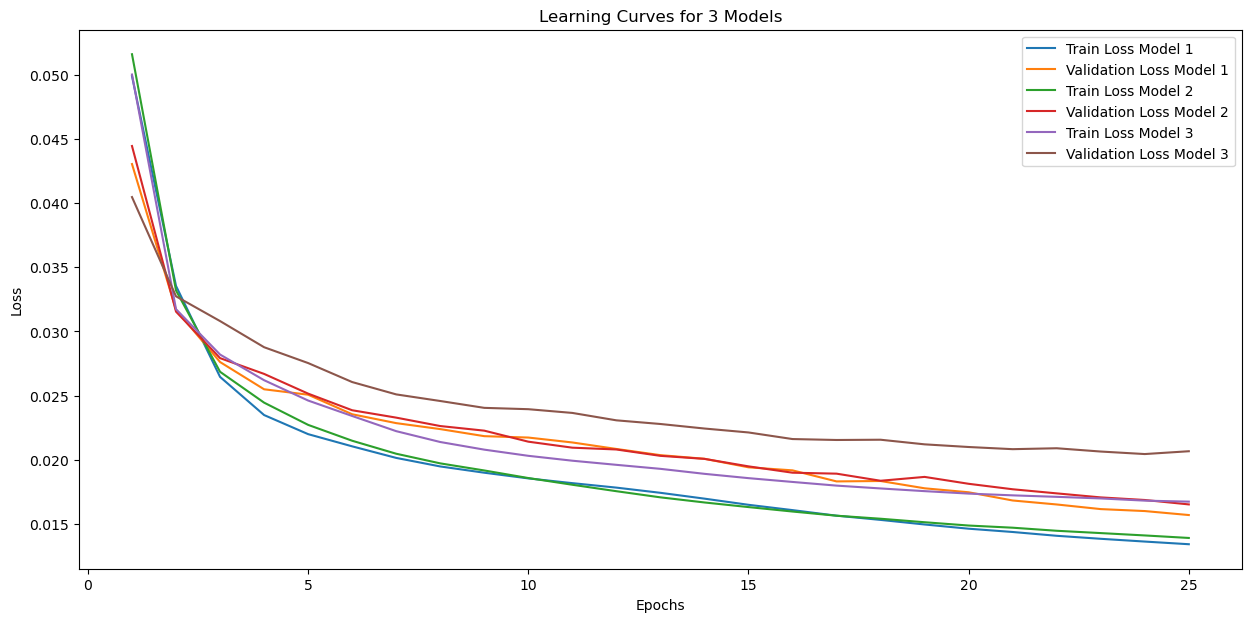

In [18]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = BigAutoencoder()
model_2 = BigAutoencoder_16()
model_3 = BigAutoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 25
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# adding models to list
ALL_MODELS.append(models)

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()


In [19]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == 0
    # indices of other digits
    other_indices = sorted_labels_indices != 0
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')
    print(f'Model nr {idx}. F1 Score at Best Threshold: {f1_scores[idx][best_threshold_index]:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)



Model nr 0. Best Threshold: 0.4737
Model nr 0. Precision at Best Threshold: 0.9363
Model nr 0. Recall at Best Threshold: 0.9593
Model nr 0. F1 Score at Best Threshold: 0.9477
Model nr 1. Best Threshold: 0.4737
Model nr 1. Precision at Best Threshold: 0.9511
Model nr 1. Recall at Best Threshold: 0.9745
Model nr 1. F1 Score at Best Threshold: 0.9626
Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.9474
Model nr 2. Recall at Best Threshold: 0.9707
Model nr 2. F1 Score at Best Threshold: 0.9589


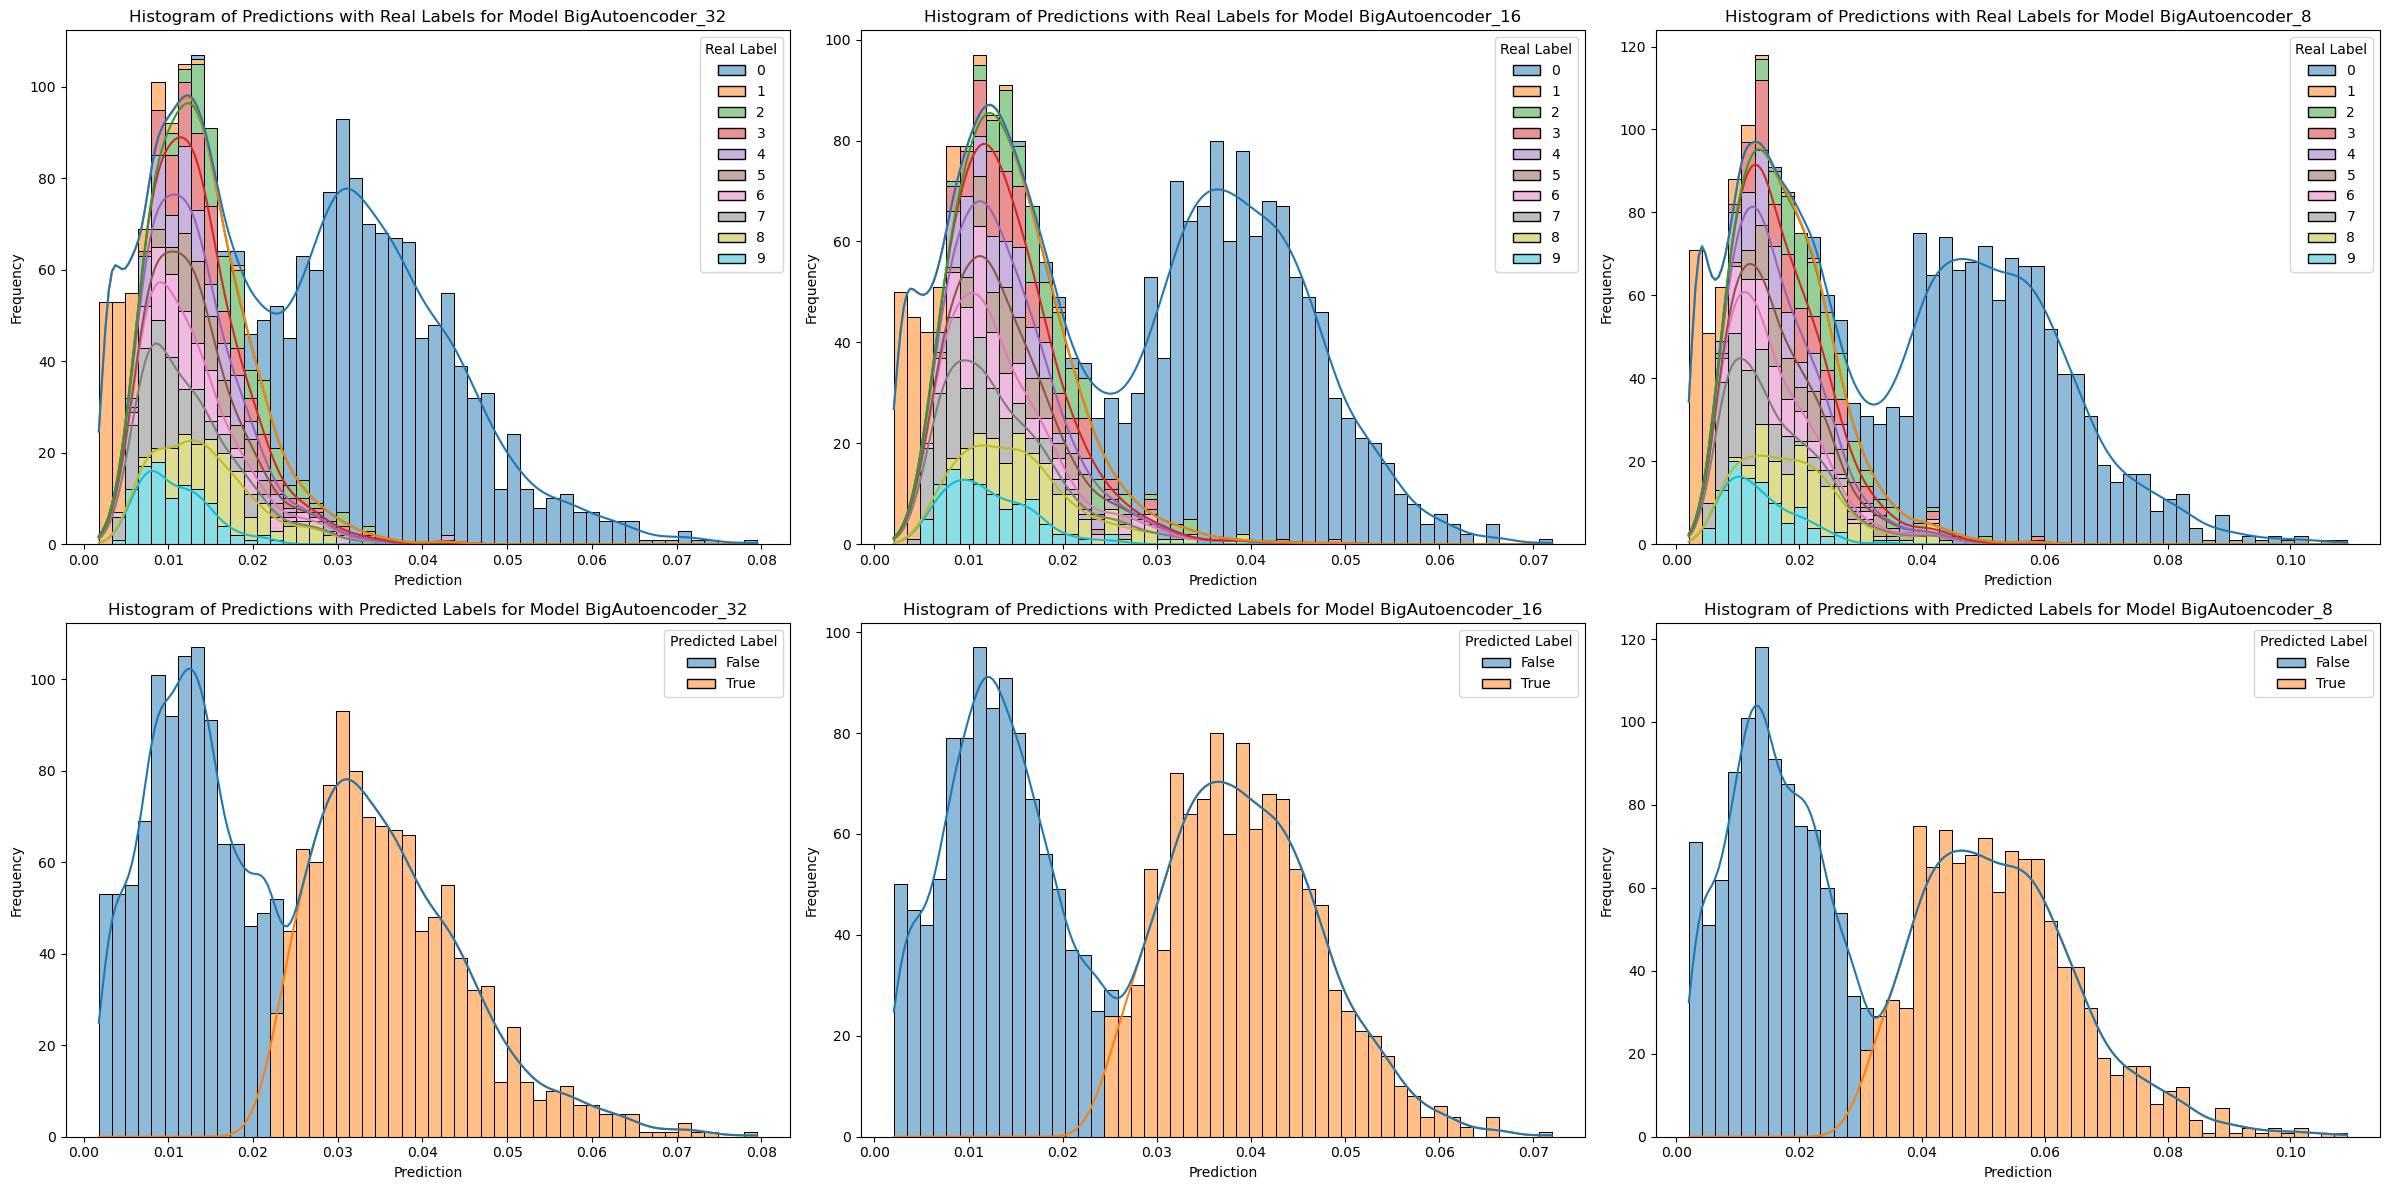

In [20]:
import seaborn as sns
import pandas as pd

names = {
    0: 'BigAutoencoder_32',
    1: 'BigAutoencoder_16',
    2: 'BigAutoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

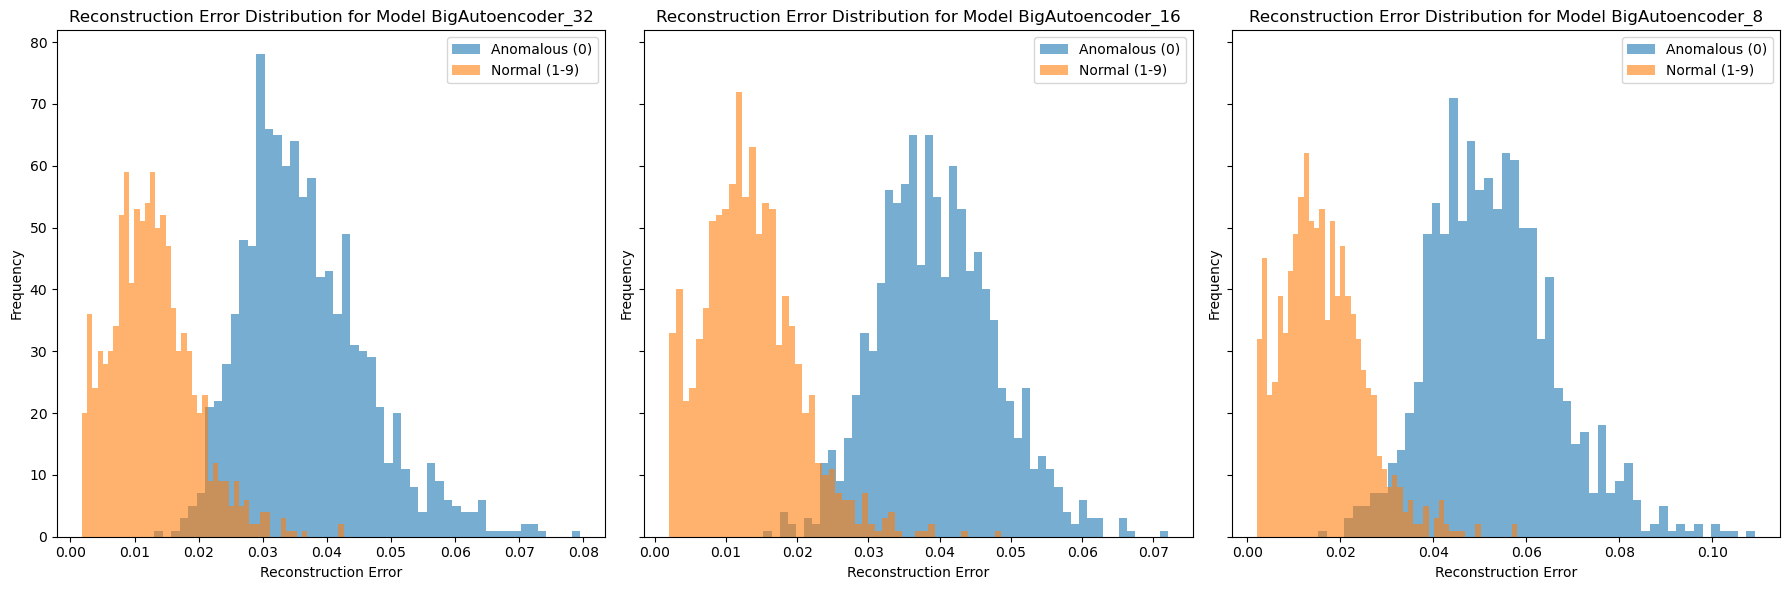

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

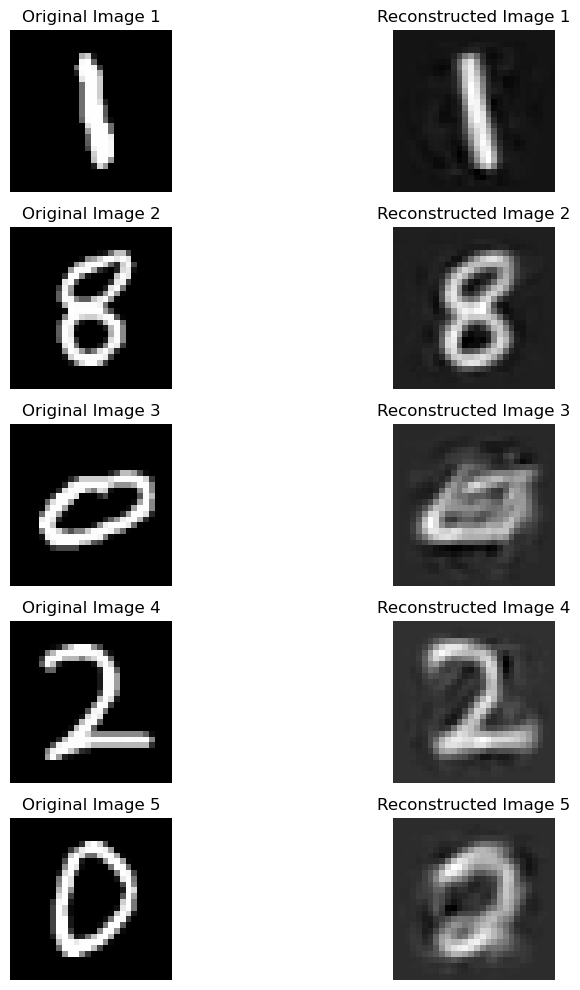

In [22]:
import matplotlib.pyplot as plt

# Function to plot original and reconstructed images
def plot_examples(data_loader, model, num_examples=5, x=6):
    model.eval()
    with torch.no_grad():
        for batch in data_loader:
            x = x-1
            if x == 0:
                inputs, _ = batch
                inputs = inputs.to(device)
                outputs = model(inputs)
                break

    fig, axes = plt.subplots(num_examples, 2, figsize=(10, 10))
    for i in range(num_examples):
        original_image = inputs[i].cpu().view(28, 28).detach().numpy()
        reconstructed_image = outputs[i].cpu().view(28, 28).detach().numpy()

        axes[i, 0].imshow(original_image, cmap='gray')
        axes[i, 0].set_title(f'Original Image {i+1}')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(reconstructed_image, cmap='gray')
        axes[i, 1].set_title(f'Reconstructed Image {i+1}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Plot examples from the test_loader
plot_examples(test_loader, models[2])

## Autoencoder

[[], [], []]
[[], [], []]
Model nr 0. Epoch [1/20], Train_loss: 0.0473, Val_loss: 0.0349
Model nr 0. Epoch [2/20], Train_loss: 0.0291, Val_loss: 0.0295
Model nr 0. Epoch [3/20], Train_loss: 0.0247, Val_loss: 0.0257
Model nr 0. Epoch [4/20], Train_loss: 0.0220, Val_loss: 0.0230
Model nr 0. Epoch [5/20], Train_loss: 0.0200, Val_loss: 0.0214
Model nr 0. Epoch [6/20], Train_loss: 0.0188, Val_loss: 0.0204
Model nr 0. Epoch [7/20], Train_loss: 0.0178, Val_loss: 0.0192
Model nr 0. Epoch [8/20], Train_loss: 0.0169, Val_loss: 0.0184
Model nr 0. Epoch [9/20], Train_loss: 0.0163, Val_loss: 0.0176
Model nr 0. Epoch [10/20], Train_loss: 0.0157, Val_loss: 0.0172
Model nr 0. Epoch [11/20], Train_loss: 0.0153, Val_loss: 0.0166
Model nr 0. Epoch [12/20], Train_loss: 0.0149, Val_loss: 0.0162
Model nr 0. Epoch [13/20], Train_loss: 0.0145, Val_loss: 0.0159
Model nr 0. Epoch [14/20], Train_loss: 0.0142, Val_loss: 0.0154
Model nr 0. Epoch [15/20], Train_loss: 0.0138, Val_loss: 0.0152
Model nr 0. Epoch [16/2

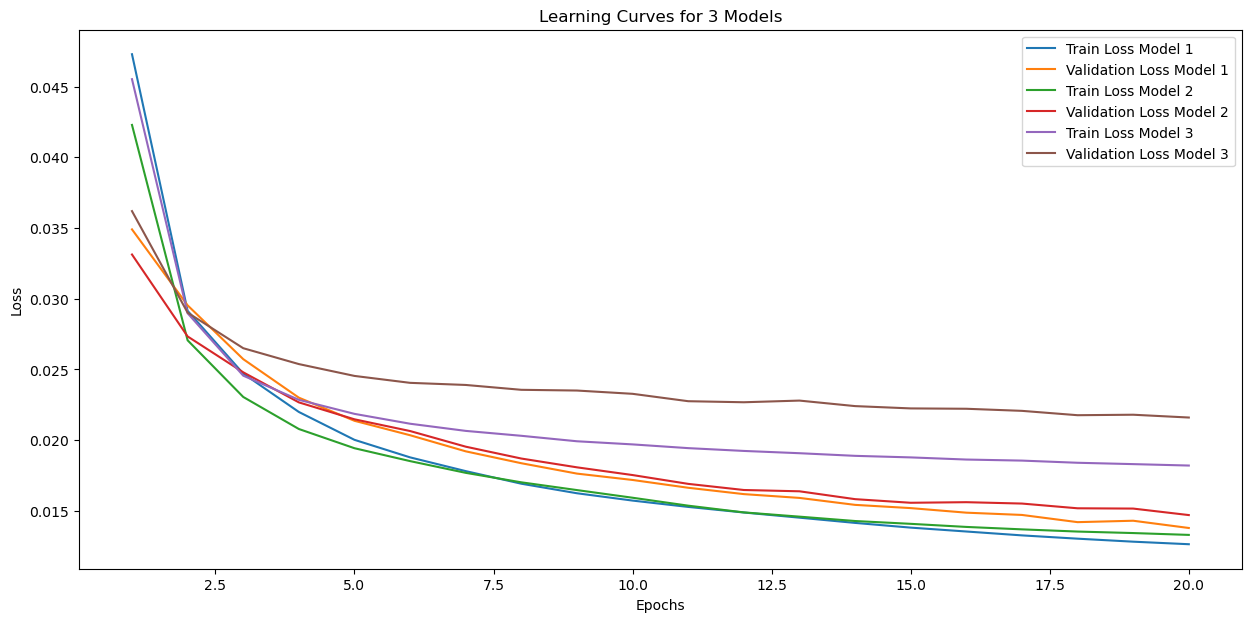

In [23]:
# ONE CODE

# initialization
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model_1 = Autoencoder()
model_2 = Autoencoder_16()
model_3 = Autoencoder_8()
models = [model_1, model_2, model_3]

criterion = nn.MSELoss()

# Lists to store losses
train_losses = [[], [], []]
val_losses = [[], [], []]
print(train_losses)
print(val_losses)

# train 
num_epochs = 20
for idx, model in enumerate(models):
    model.to(device)
    model.train()

    optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
    for epoch in range(num_epochs):
        epoch_train_loss = 0
        for batch in train_loader:
            batch = batch.to(device)
            batch_reshaped = batch

            optimizer.zero_grad()
            output = model(batch)

            loss = criterion(output, batch_reshaped)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        epoch_train_loss /= len(train_loader)
        train_losses[idx].append(epoch_train_loss)

        # validation loss
        with torch.no_grad():
            val_loss = 0
            for val_batch, _ in val_loader:
                val_batch = val_batch.to(device)
                val_batch_reshaped = val_batch
                val_output = model(val_batch)
                val_loss += criterion(val_output, val_batch_reshaped)
            val_loss /= len(val_loader)
            val_losses[idx].append(val_loss.item())

        print(f'Model nr {idx}. Epoch [{epoch+1}/{num_epochs}], Train_loss: {epoch_train_loss:.4f}, Val_loss: {val_loss.item():.4f}')

# adding models to list
ALL_MODELS.append(models)

# Plot the learning curve for 3 models
plt.figure(figsize=(15, 7))
for idx in range(3):
    plt.plot(range(1, num_epochs + 1), train_losses[idx], label=f'Train Loss Model {idx+1}')
    plt.plot(range(1, num_epochs + 1), val_losses[idx], label=f'Validation Loss Model {idx+1}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curves for 3 Models')
plt.legend()
plt.show()


In [24]:
thresholds = torch.linspace(0, 1, 20)

all_predictions = [[] for _ in range(len(models))]
all_labels = [[] for _ in range(len(models))]
for idx, model in enumerate(models):
    model.eval()
    with torch.no_grad():
        for val_batch, val_label in val_loader_reduced:
            for example, label in zip(val_batch, val_label):
                example = example.to(device)
                out = model(example)
                all_predictions[idx].append(criterion(example, out).unsqueeze(0))
                all_labels[idx].append(label.unsqueeze(0))

# concatenate all predictions and labels and change it to tensor
for idx, l in enumerate(all_predictions):
    all_predictions[idx] = torch.cat(l)
    all_labels[idx] = torch.cat(all_labels[idx])

    assert len(all_predictions[idx]) == len(all_labels[idx])
    assert len(all_predictions[idx]) == len(val_data_reduced)


tprs = [[] for _ in range(len(models))]
fprs = [[] for _ in range(len(models))]
f1_scores = [[] for _ in range(len(models))]
precisions = [[] for _ in range(len(models))]
recalls = [[] for _ in range(len(models))]
sorted_labels = [[] for _ in range(len(models))]

# sort all_predictions and all_labels according to all_predictions
for idx, predictions in enumerate(all_predictions):
    all_predictions[idx], indices = torch.sort(predictions, descending=True)
    sorted_labels[idx] = [all_labels[idx][i] for i in indices.cpu()]
    neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels[idx]])
    sorted_labels_indices = torch.tensor(sorted_labels[idx])

    # indices of 0
    zeros_indices = sorted_labels_indices == 0
    # indices of other digits
    other_indices = sorted_labels_indices != 0
    for threshold in thresholds:
        positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), threshold)
        negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), threshold)

        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()

        tpr = tp/(tp + fn)
        fpr = fp/(fp + tn)
        fprs[idx].append(fpr.cpu())
        tprs[idx].append(tpr.cpu())

        f1_score = 2*tp/(2*tp + fp + fn)
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)

        f1_scores[idx].append(f1_score.cpu())
        precisions[idx].append(precision.cpu())
        recalls[idx].append(recall.cpu())

    # Find the threshold with the highest F1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores[idx]))
    best_threshold = thresholds[best_threshold_index]
    best_precision = precisions[idx][best_threshold_index]
    best_recall = recalls[idx][best_threshold_index]

    print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
    print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
    print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')
    print(f'Model nr {idx}. F1 Score at Best Threshold: {f1_scores[idx][best_threshold_index]:.4f}')

    positive_class = all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])
    negative_class = all_predictions[idx] < torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])

    tp = positive_class[zeros_indices].sum()
    fn = negative_class[zeros_indices].sum()
    tn = negative_class[other_indices].sum()
    fp = positive_class[other_indices].sum()

    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)



Model nr 0. Best Threshold: 0.4211
Model nr 0. Precision at Best Threshold: 0.8069
Model nr 0. Recall at Best Threshold: 0.9092
Model nr 0. F1 Score at Best Threshold: 0.8550
Model nr 1. Best Threshold: 0.4737
Model nr 1. Precision at Best Threshold: 0.8827
Model nr 1. Recall at Best Threshold: 0.9044
Model nr 1. F1 Score at Best Threshold: 0.8935
Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.9271
Model nr 2. Recall at Best Threshold: 0.9499
Model nr 2. F1 Score at Best Threshold: 0.9383


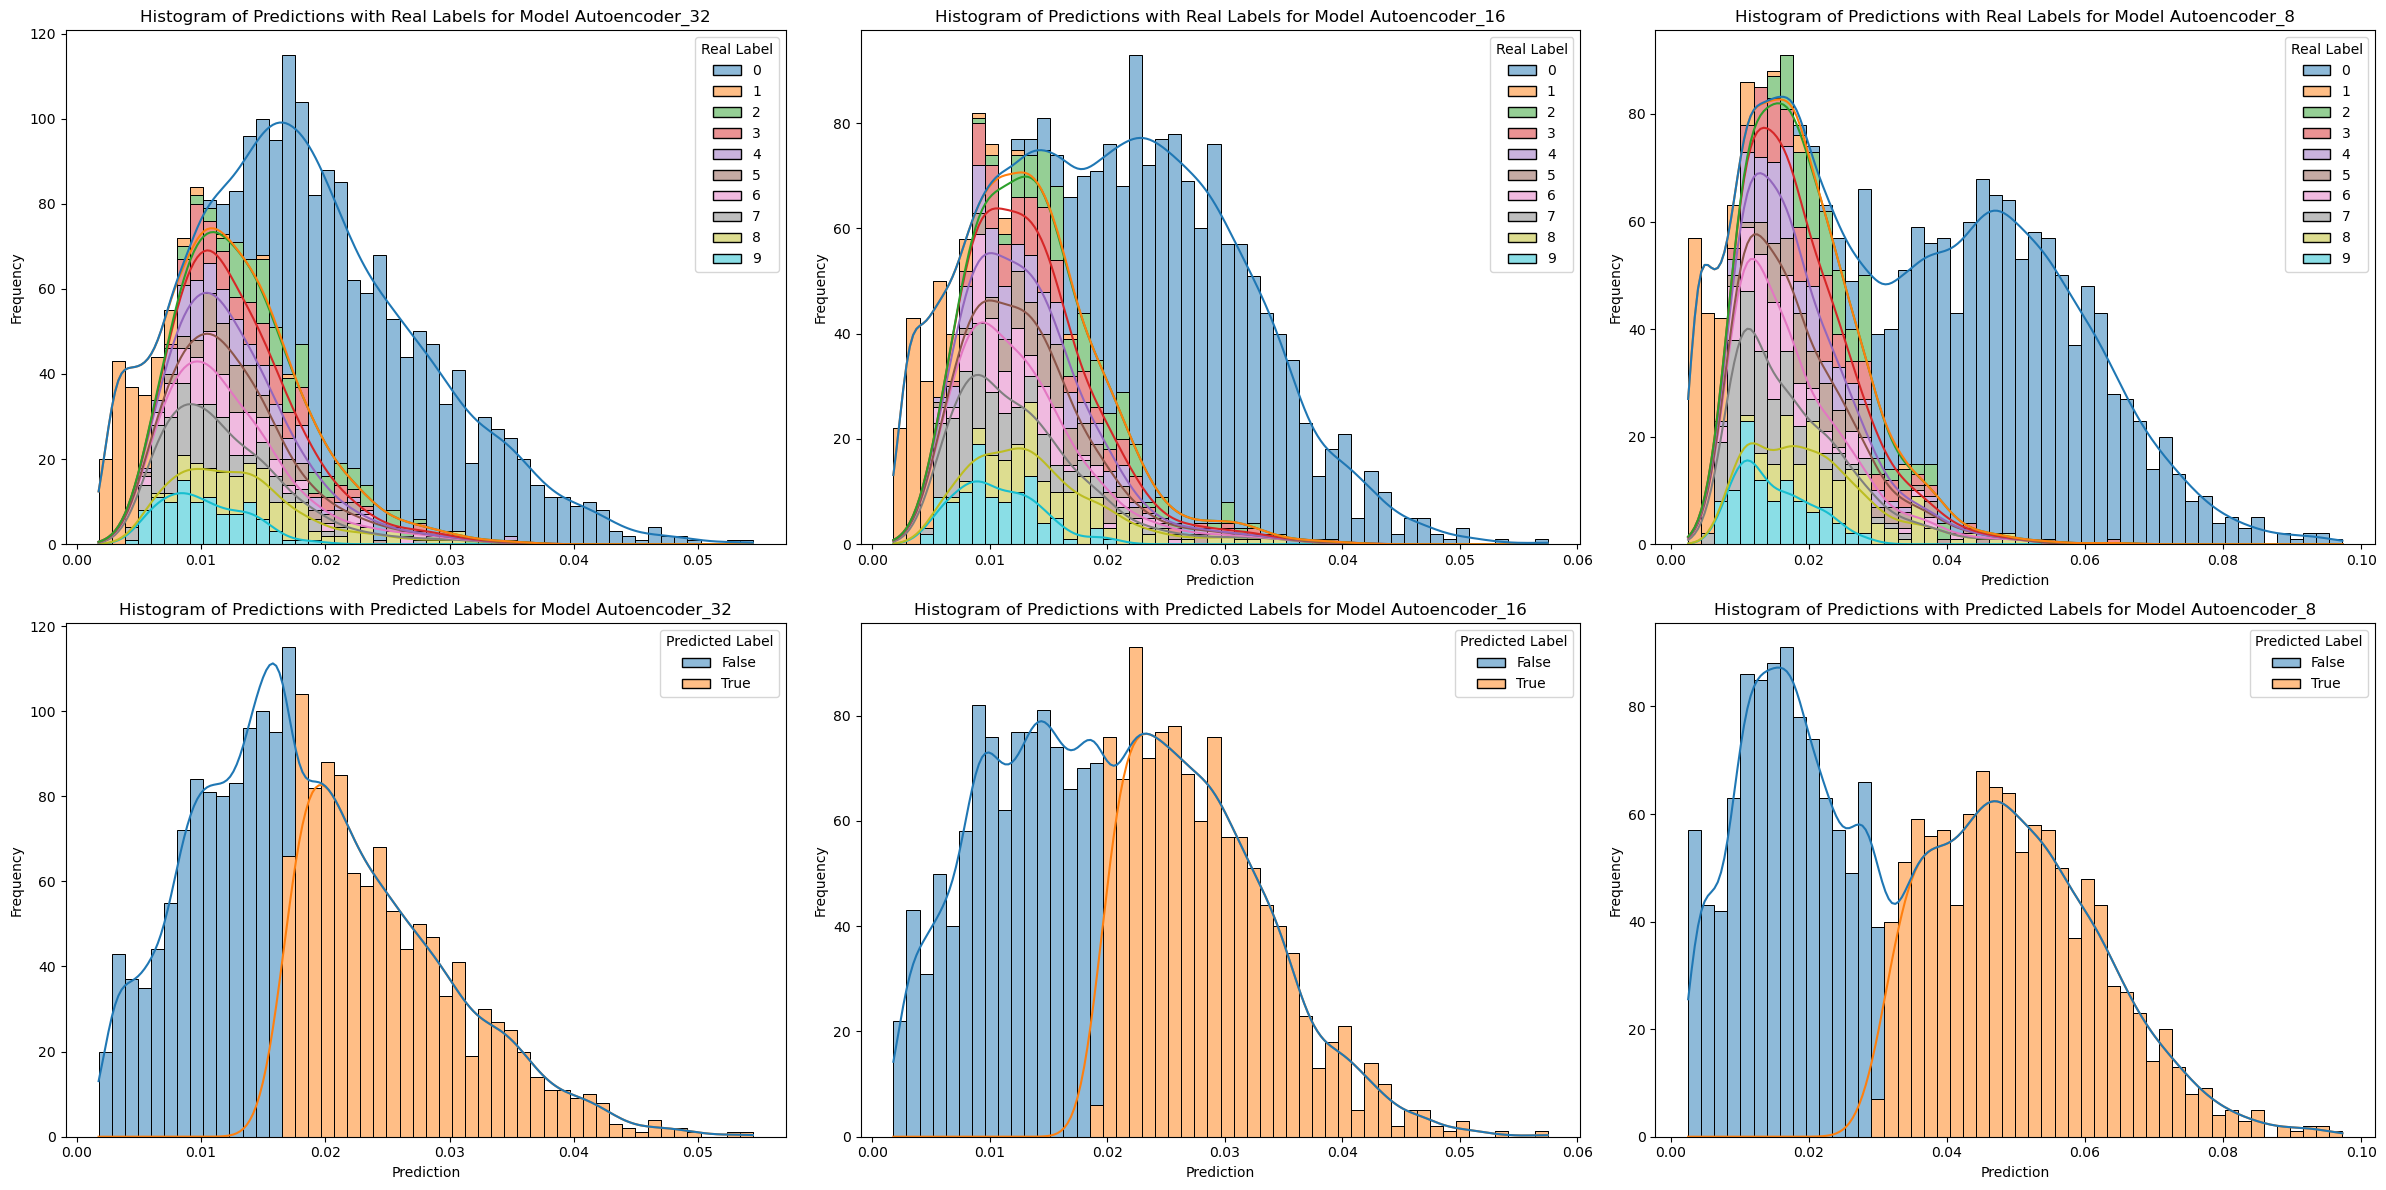

In [25]:
import seaborn as sns
import pandas as pd

names = {
    0: 'Autoencoder_32',
    1: 'Autoencoder_16',
    2: 'Autoencoder_8'
}

fig, axes = plt.subplots(2, 3, figsize=(24, 12))

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()
    predicted_labels_np = (all_predictions[idx] >= torch.quantile(all_predictions[idx].cpu(), thresholds[best_threshold_index])).cpu().numpy()

    # Create a DataFrame for easier plotting
    data = {
        'Prediction': all_predictions_np,
        'Real Label': sorted_labels_np,
        'Predicted Label': predicted_labels_np
    }

    df = pd.DataFrame(data)

    # Plot the histogram of predictions with real labels
    sns.histplot(data=df, x='Prediction', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0, idx])
    axes[0, idx].set_title(f'Histogram of Predictions with Real Labels for Model {names[idx]}')
    axes[0, idx].set_xlabel('Prediction')
    axes[0, idx].set_ylabel('Frequency')

    # Plot the histogram of predictions with predicted labels
    sns.histplot(data=df, x='Prediction', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1, idx])
    axes[1, idx].set_title(f'Histogram of Predictions with Predicted Labels for Model {names[idx]}')
    axes[1, idx].set_xlabel('Prediction')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

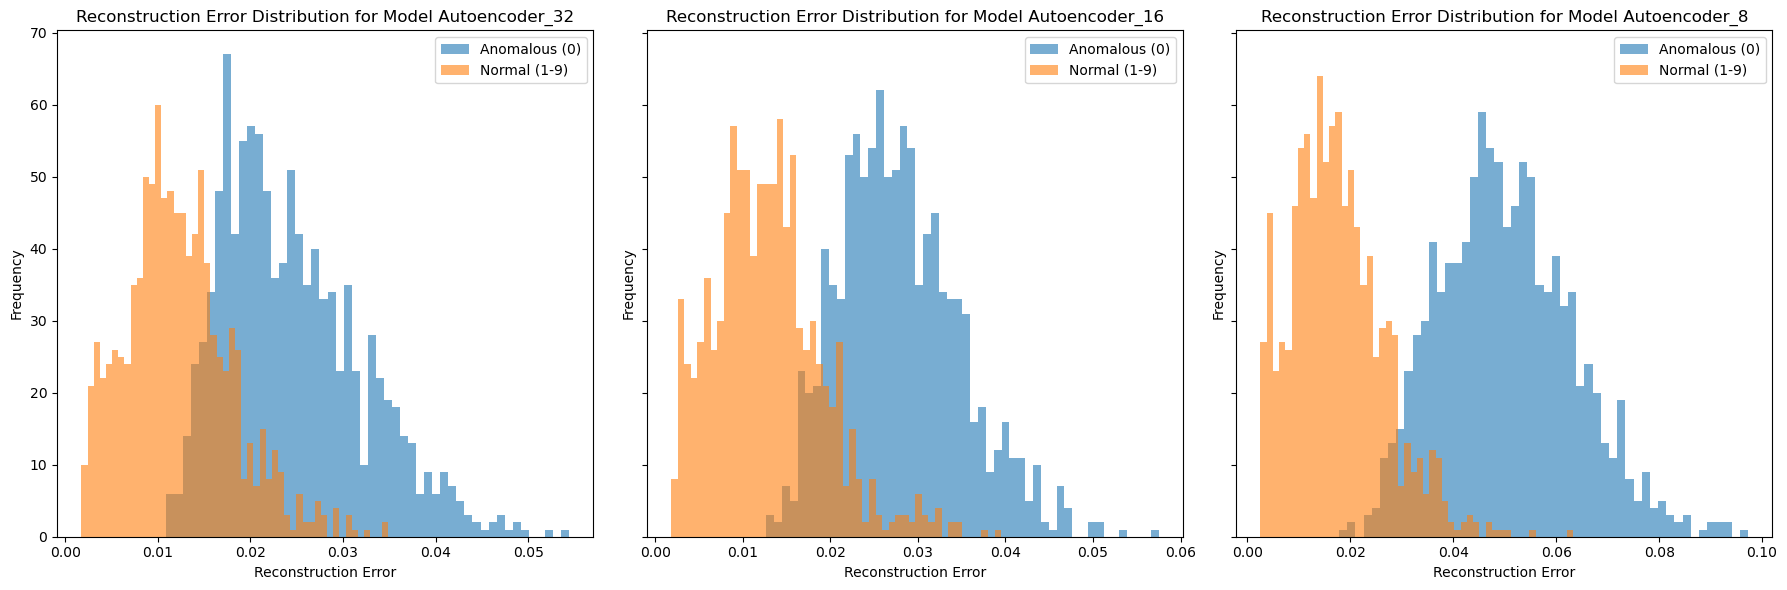

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, model in enumerate(models):
    # Convert predictions and labels to numpy arrays for plotting
    all_predictions_np = all_predictions[idx].cpu().numpy()
    sorted_labels_np = torch.tensor(sorted_labels[idx]).cpu().numpy()

    # Plot the histogram
    axes[idx].hist(all_predictions_np[sorted_labels_np == 0], bins=50, alpha=0.6, label="Anomalous (0)")
    axes[idx].hist(all_predictions_np[sorted_labels_np != 0], bins=50, alpha=0.6, label="Normal (1-9)")
    axes[idx].set_xlabel("Reconstruction Error")
    axes[idx].set_ylabel("Frequency")
    axes[idx].set_title(f"Reconstruction Error Distribution for Model {names[idx]}")
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [27]:
print(ALL_MODELS)

[[SmallAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=784, bias=True)
  )
), SmallAutoencoder_16(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=

# SNN

In [28]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.ae = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784)
        )

    def forward(self, x):
        return self.ae(x)

## Sinabs

In [29]:
def conversion_ann_snn(ann_model):
    result = nn.Sequential()
    for name, layer in ann_model.encoder.named_children():
        result.add_module(f"encoder_{name}", layer)
    for name, layer in ann_model.decoder.named_children():
        result.add_module(f"decoder_{name}", layer)
    return result

a = conversion_ann_snn(models[2])
print(a)

Sequential(
  (encoder_0): Linear(in_features=784, out_features=256, bias=True)
  (encoder_1): ReLU()
  (encoder_2): Linear(in_features=256, out_features=128, bias=True)
  (encoder_3): ReLU()
  (encoder_4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_5): ReLU()
  (encoder_6): Linear(in_features=64, out_features=8, bias=True)
  (decoder_0): Linear(in_features=8, out_features=64, bias=True)
  (decoder_1): ReLU()
  (decoder_2): Linear(in_features=64, out_features=128, bias=True)
  (decoder_3): ReLU()
  (decoder_4): Linear(in_features=128, out_features=256, bias=True)
  (decoder_5): ReLU()
  (decoder_6): Linear(in_features=256, out_features=784, bias=True)
)


In [30]:
class MNIST(datasets.MNIST):
    def __init__(self, root, train=True, is_spiking=False, time_window=100):
        super().__init__(
            root=root, train=train, download=True, transform=transforms.ToTensor()
        )
        self.is_spiking = is_spiking
        self.time_window = time_window

    def __getitem__(self, index):
        img, target = self.data[index].view(1, -1), self.targets[index]
        # img is now a tensor of 1x784

        if self.is_spiking:
            img = (torch.rand(self.time_window, *img.shape) < img).float()

        return img, target

In [31]:
from sinabs.from_torch import from_model

input_shape = (1, 784)
num_timesteps = 100  # per sample

sinabs_model = from_model(
    a, input_shape=input_shape, add_spiking_output=True, synops=False, num_timesteps=num_timesteps
)

In [32]:
sinabs_model.spiking_model

Sequential(
  (encoder_0): Linear(in_features=784, out_features=256, bias=True)
  (encoder_1): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., device='mps:0'), min_v_mem=Parameter containing:
  tensor(-1., device='mps:0'), batch_size=-1, num_timesteps=100)
  (encoder_2): Linear(in_features=256, out_features=128, bias=True)
  (encoder_3): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., device='mps:0'), min_v_mem=Parameter containing:
  tensor(-1., device='mps:0'), batch_size=-1, num_timesteps=100)
  (encoder_4): Linear(in_features=128, out_features=64, bias=True)
  (encoder_5): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., device='mps:0'), min_v_mem=Parameter containing:
  tensor(-1., device='mps:0'), batch_size=-1, num_timesteps=100)
  (encoder_6): Linear(in_features=64, out_features=8, bias=True)
  (decoder_0): Linear(in_features=8, out_features=64, bias=True)
  (decoder_1): IAFSqueeze(spike_threshold=Parameter containing:
  tensor(1., devic

In [33]:
test_batch_size = 10

spike_mnist_test = MNIST(
    "../data", train=False, is_spiking=True, time_window=num_timesteps
)
spike_test_loader = DataLoader(
    spike_mnist_test, batch_size=test_batch_size, shuffle=True
)

# ISTOTNE

In [34]:
# 1. Convert AE to SNN
def conversion_ann_snn(ann_model):
    result = nn.Sequential()
    for name, layer in ann_model.encoder.named_children():
        result.add_module(f"encoder_{name}", layer)
    for name, layer in ann_model.decoder.named_children():
        result.add_module(f"decoder_{name}", layer)
    return result

def convert_to_snn(a, num_steps=100):
    a = conversion_ann_snn(a)
    snn = from_model(
        a,
        input_shape=(784,),
        add_spiking_output=True, # ?
        num_timesteps=num_steps
    )
    return snn

def detect_anomalies_spiking(snn_model, val_loader_reduced, device, num_examples=500):
    reconstructions = []
    originals = []
    labels = []
    errors = []
    
    with torch.no_grad():
        # Get first batch of examples
        for data, label in val_loader_reduced:
            if len(originals) >= num_examples:
                break
                
            for example, l in zip(data, label):
                if len(originals) >= num_examples:
                    break
                    
                # Create input spikes
                example = example.to(device)
                input_spikes = (torch.rand(100, 1, 784, device=device) < example).float()
                
                # Get reconstruction using spiking model
                output_spikes = snn_model.spiking_model(input_spikes.reshape(-1, 784))
                output_spikes = output_spikes.reshape(100, -1, 784)
                
                # Average spikes over time dimension to get reconstruction
                reconstruction = output_spikes.mean(dim=0).squeeze()
                
                # Calculate reconstruction error
                error = torch.mean((reconstruction - example) ** 2)
                
                # Store results
                reconstructions.append(reconstruction.cpu())
                originals.append(example.cpu())
                labels.append(l.cpu())
                errors.append(error.cpu())
    return errors, reconstructions, originals, labels

def check_thresholds(errors, labels):
    f1_scores = []

    # Sort the errors and get corresponding labels
    errors = torch.tensor(errors)
    sorted_errors, indices = torch.sort(errors, descending=True)
    sorted_labels = [labels[i] for i in indices.cpu()]

    thresholds = torch.linspace(0, 1, 20)
    # Calculate metrics at different thresholds
    for threshold in thresholds:
        # Determine predictions based on threshold
        predictions = sorted_errors >= torch.quantile(errors, threshold)
        
        # Convert labels to binary (0 for anomaly, 1 for normal)
        binary_labels = torch.tensor([1 if label != 0 else 0 for label in sorted_labels])
        
        # Calculate confusion matrix values
        tp = torch.sum((predictions == True) & (binary_labels == 0))
        fp = torch.sum((predictions == True) & (binary_labels == 1))
        tn = torch.sum((predictions == False) & (binary_labels == 1))
        fn = torch.sum((predictions == False) & (binary_labels == 0))
        
        # Calculate metrics
        precision = tp / (tp + fp) if (tp + fp) > 0 else torch.tensor(0.)
        recall = tp / (tp + fn) if (tp + fn) > 0 else torch.tensor(0.)
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else torch.tensor(0.)
        
        f1_scores.append(f1)

    # find the best threshold according to f1 score
    best_threshold_index = torch.argmax(torch.tensor(f1_scores))
    best_threshold = thresholds[best_threshold_index]
    best_f1_score = f1_scores[best_threshold_index]

    return best_threshold, best_f1_score, indices, sorted_labels, sorted_errors


In [35]:
trained_ae = models[2]  # trained autoencoder
snn_model = convert_to_snn(trained_ae).to(device)

errors, reconstructions, originals, labels = detect_anomalies_spiking(snn_model, val_loader_reduced, device)
best_threshold, best_f1_score, indices, sorted_labels, sorted_errors = check_thresholds(errors, labels)

positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)

neg_pos_labels = torch.tensor([1 if label == 0 else 0 for label in sorted_labels])
sorted_labels_indices = torch.tensor(sorted_labels)
# indices of 0
zeros_indices = sorted_labels_indices == 0
# indices of other digits
other_indices = sorted_labels_indices != 0

tp = positive_class[zeros_indices].sum()
fn = negative_class[zeros_indices].sum()
tn = negative_class[other_indices].sum()
fp = positive_class[other_indices].sum()

tpr = tp/(tp + fn)
fpr = fp/(fp + tn)

best_precision = tp/(tp + fp)
best_recall = tp/(tp + fn)

print(f'Model nr {idx}. Best Threshold: {best_threshold:.4f}')
print(f'Model nr {idx}. Precision at Best Threshold: {best_precision:.4f}')
print(f'Model nr {idx}. Recall at Best Threshold: {best_recall:.4f}')

Model nr 2. Best Threshold: 0.4737
Model nr 2. Precision at Best Threshold: 0.9392
Model nr 2. Recall at Best Threshold: 0.9611


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/2057230012.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/2057230012.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/3848587002.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  errors_np = torch.tensor(sorted_errors).cpu()
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/3848587002.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predicted_labels_np = (errors_np >= torch.quantile(torch.tensor(sorted_errors), best_threshold)).cpu()


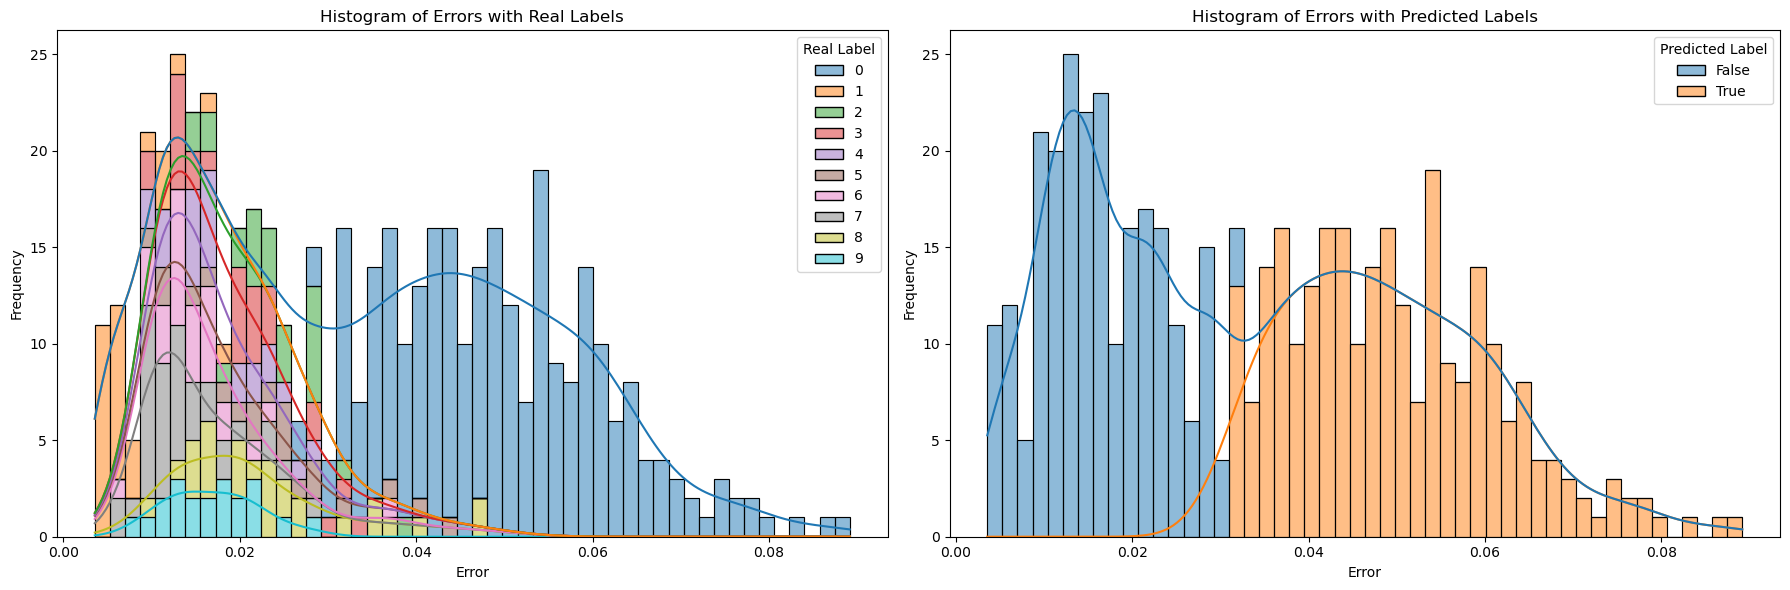

In [36]:
import seaborn as sns
import pandas as pd

# Convert errors and labels to numpy arrays for plotting
errors_np = torch.tensor(sorted_errors).cpu()
sorted_labels_np = torch.tensor(sorted_labels).cpu()
predicted_labels_np = (errors_np >= torch.quantile(torch.tensor(sorted_errors), best_threshold)).cpu()

# Create a DataFrame for easier plotting
data = {
    'Error': errors_np,
    'Real Label': sorted_labels_np,
    'Predicted Label': predicted_labels_np
}

df = pd.DataFrame(data)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the histogram of errors with real labels
sns.histplot(data=df, x='Error', hue='Real Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Errors with Real Labels')
axes[0].set_xlabel('Error')
axes[0].set_ylabel('Frequency')

# Plot the histogram of errors with predicted labels
sns.histplot(data=df, x='Error', hue='Predicted Label', multiple='stack', palette='tab10', bins=50, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Errors with Predicted Labels')
axes[1].set_xlabel('Error')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

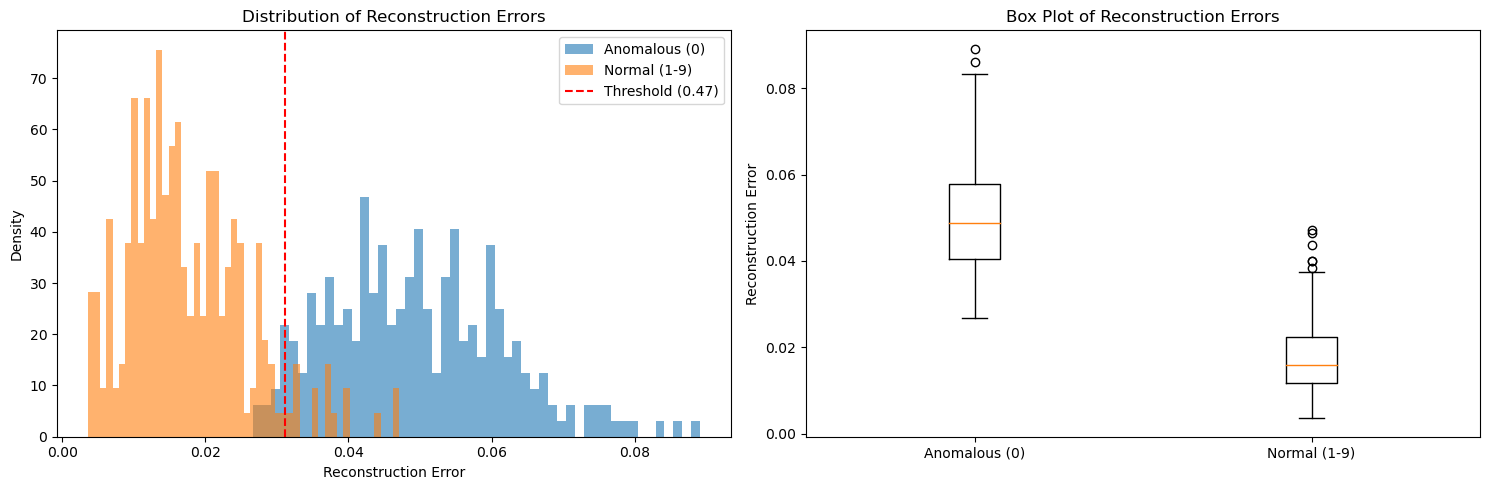

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Histogram of errors separated by normal vs anomalous
anomalous_errors = sorted_errors[sorted_labels_np == 0]
normal_errors = sorted_errors[sorted_labels_np != 0]

axes[0].hist(anomalous_errors.cpu(), bins=50, alpha=0.6, label='Anomalous (0)', density=True)
axes[0].hist(normal_errors.cpu(), bins=50, alpha=0.6, label='Normal (1-9)', density=True)
axes[0].axvline(torch.quantile(sorted_errors, best_threshold).cpu(), color='r', linestyle='--', 
                label=f'Threshold ({best_threshold:.2f})')
axes[0].set_xlabel('Reconstruction Error')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Reconstruction Errors')
axes[0].legend()

# Plot 2: Box plot comparison
box_data = [anomalous_errors.cpu().numpy(), normal_errors.cpu().numpy()]
axes[1].boxplot(box_data, labels=['Anomalous (0)', 'Normal (1-9)'])
axes[1].set_ylabel('Reconstruction Error')
axes[1].set_title('Box Plot of Reconstruction Errors')

plt.tight_layout()
plt.show()


Processing model set 1/3
Processing model 1/3


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/46730348.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/46730348.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)


Model metrics:
Best Threshold: 0.4211
Precision at Best Threshold: 0.7336
Recall at Best Threshold: 0.8480
F1 Score: 0.7866
Processing model 2/3
Model metrics:
Best Threshold: 0.3684
Precision at Best Threshold: 0.8006
Recall at Best Threshold: 0.9547
F1 Score: 0.8709
Processing model 3/3
Model metrics:
Best Threshold: 0.4737
Precision at Best Threshold: 0.9316
Recall at Best Threshold: 0.9351
F1 Score: 0.9333


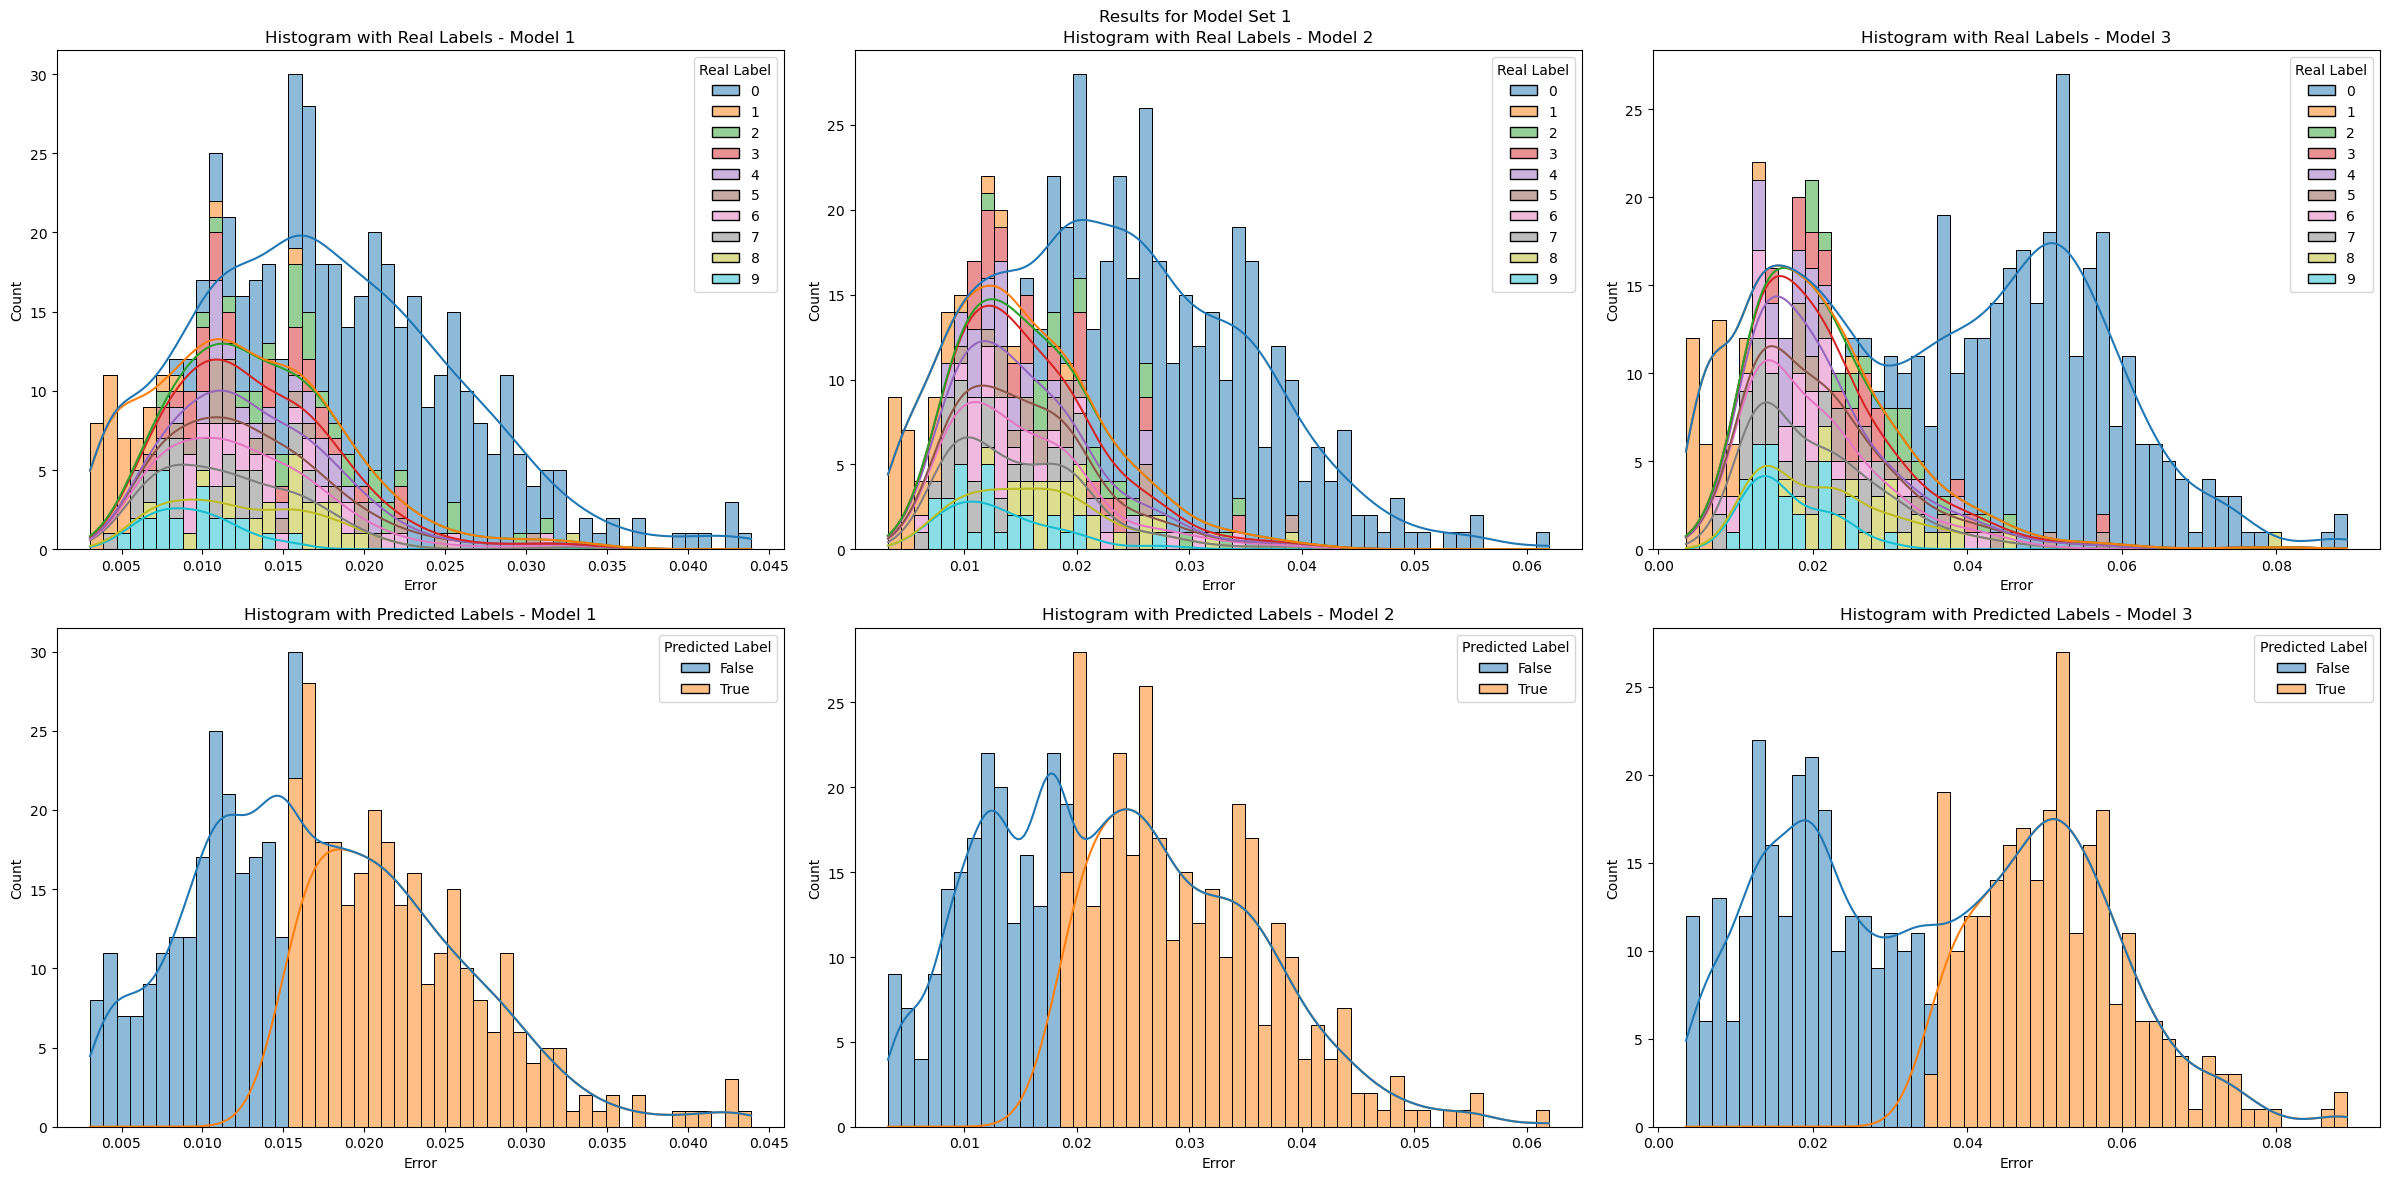


Processing model set 2/3
Processing model 1/3


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/46730348.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/46730348.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)


Model metrics:
Best Threshold: 0.4211
Precision at Best Threshold: 0.9308
Recall at Best Threshold: 0.9890
F1 Score: 0.9590
Processing model 2/3
Model metrics:
Best Threshold: 0.4211
Precision at Best Threshold: 0.9481
Recall at Best Threshold: 0.9821
F1 Score: 0.9648
Processing model 3/3
Model metrics:
Best Threshold: 0.5263
Precision at Best Threshold: 0.9705
Recall at Best Threshold: 0.9312
F1 Score: 0.9504


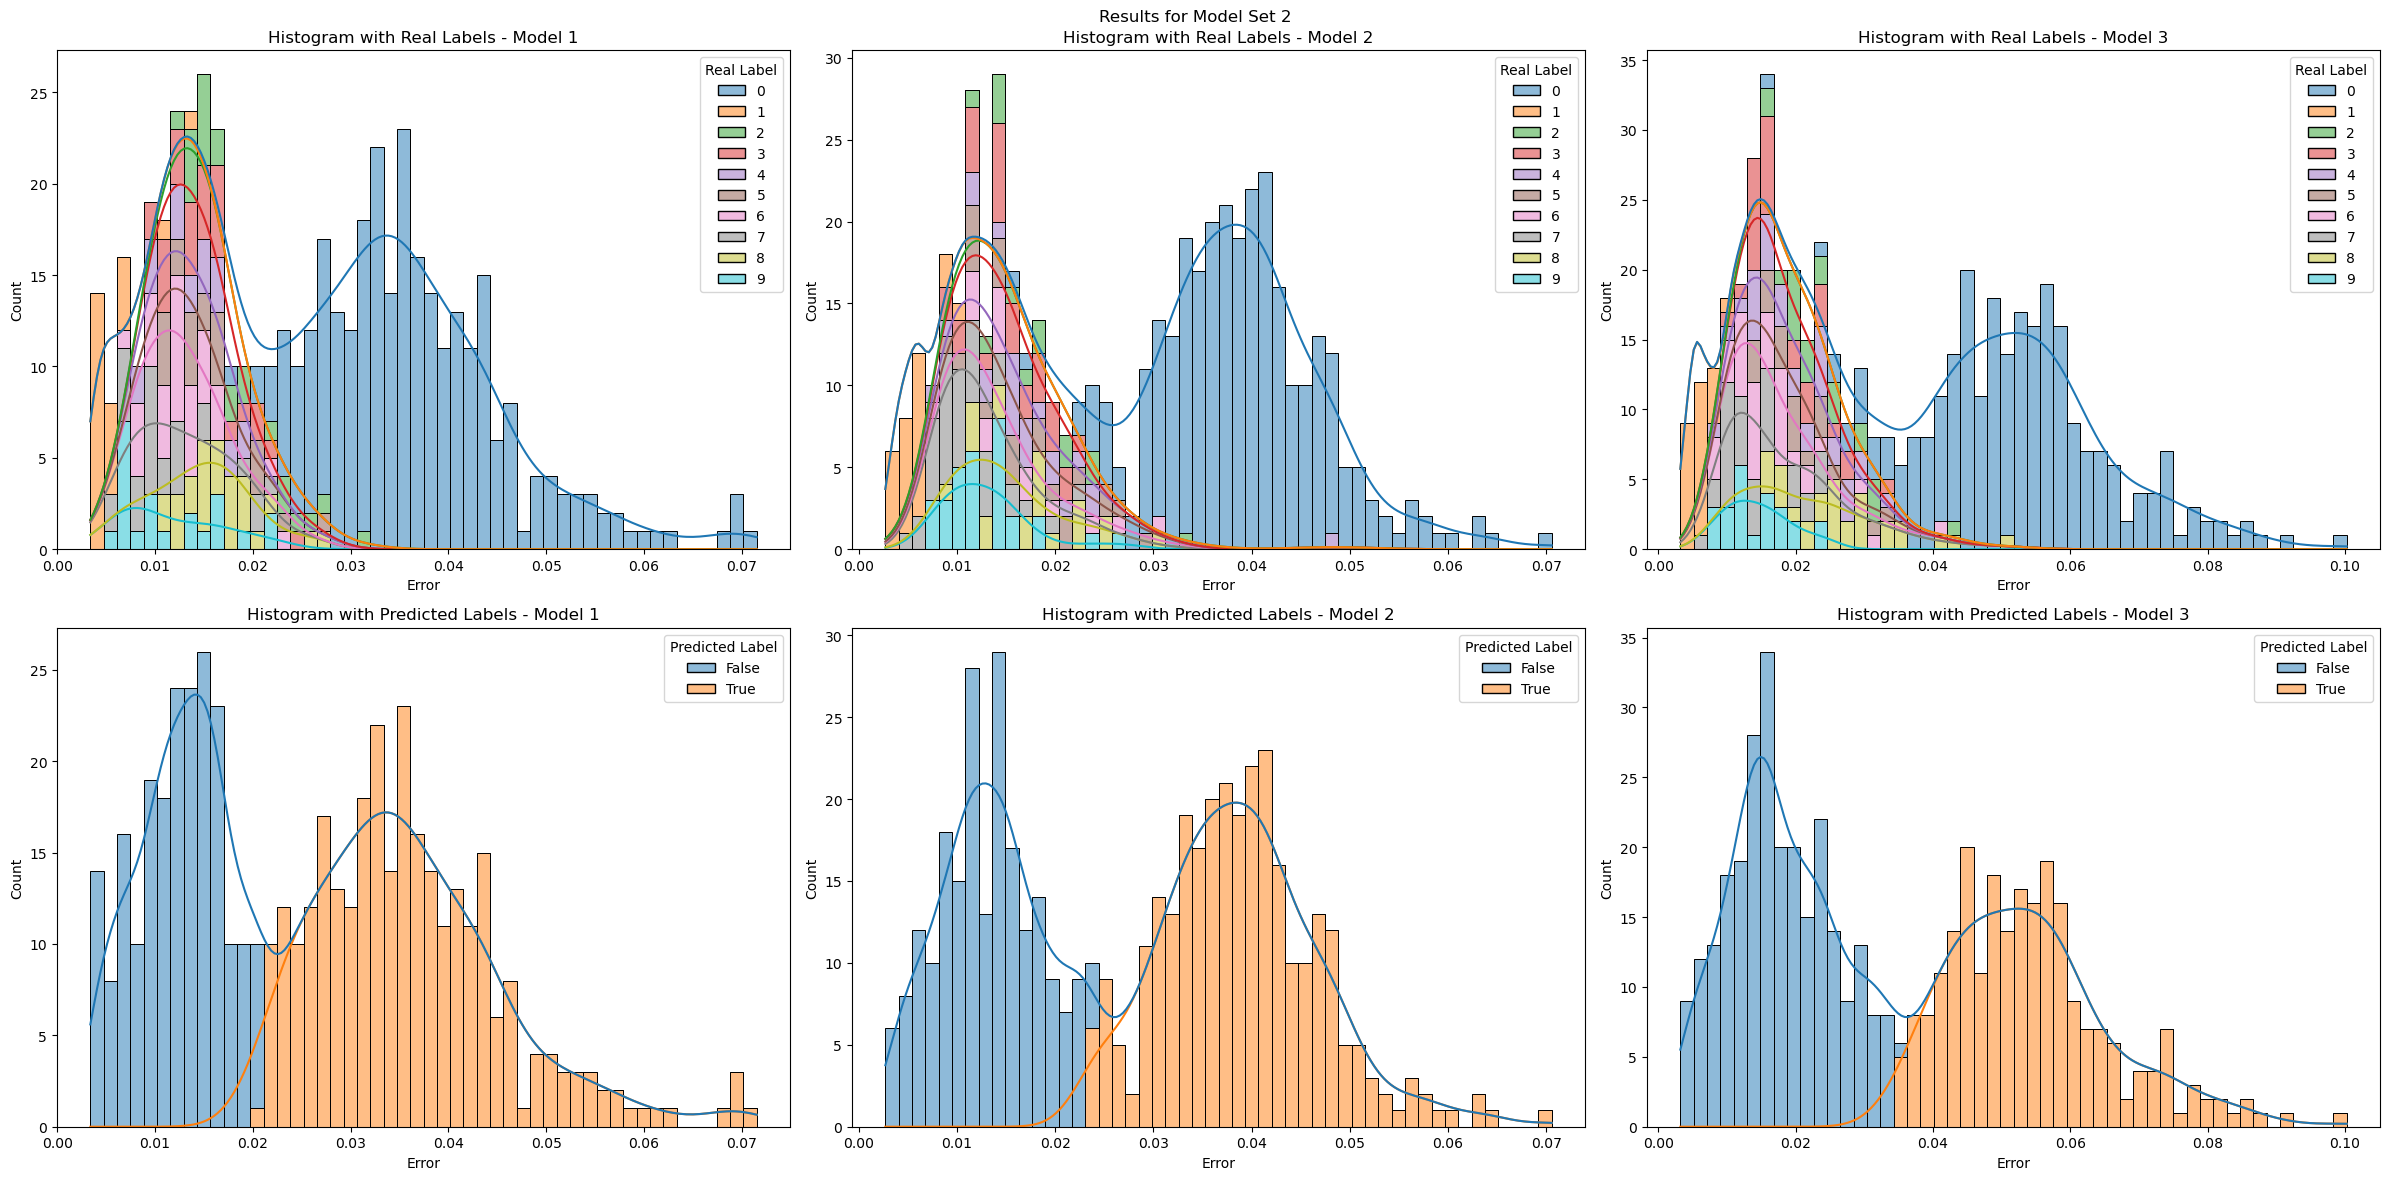


Processing model set 3/3
Processing model 1/3


/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/46730348.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
/var/folders/5f/82lq0pq96q17kcpzwpq3dlm40000gn/T/ipykernel_49407/46730348.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)


Model metrics:
Best Threshold: 0.4211
Precision at Best Threshold: 0.8201
Recall at Best Threshold: 0.9046
F1 Score: 0.8603
Processing model 2/3
Model metrics:
Best Threshold: 0.4737
Precision at Best Threshold: 0.8593
Recall at Best Threshold: 0.9004
F1 Score: 0.8794
Processing model 3/3
Model metrics:
Best Threshold: 0.4737
Precision at Best Threshold: 0.9468
Recall at Best Threshold: 0.9326
F1 Score: 0.9396


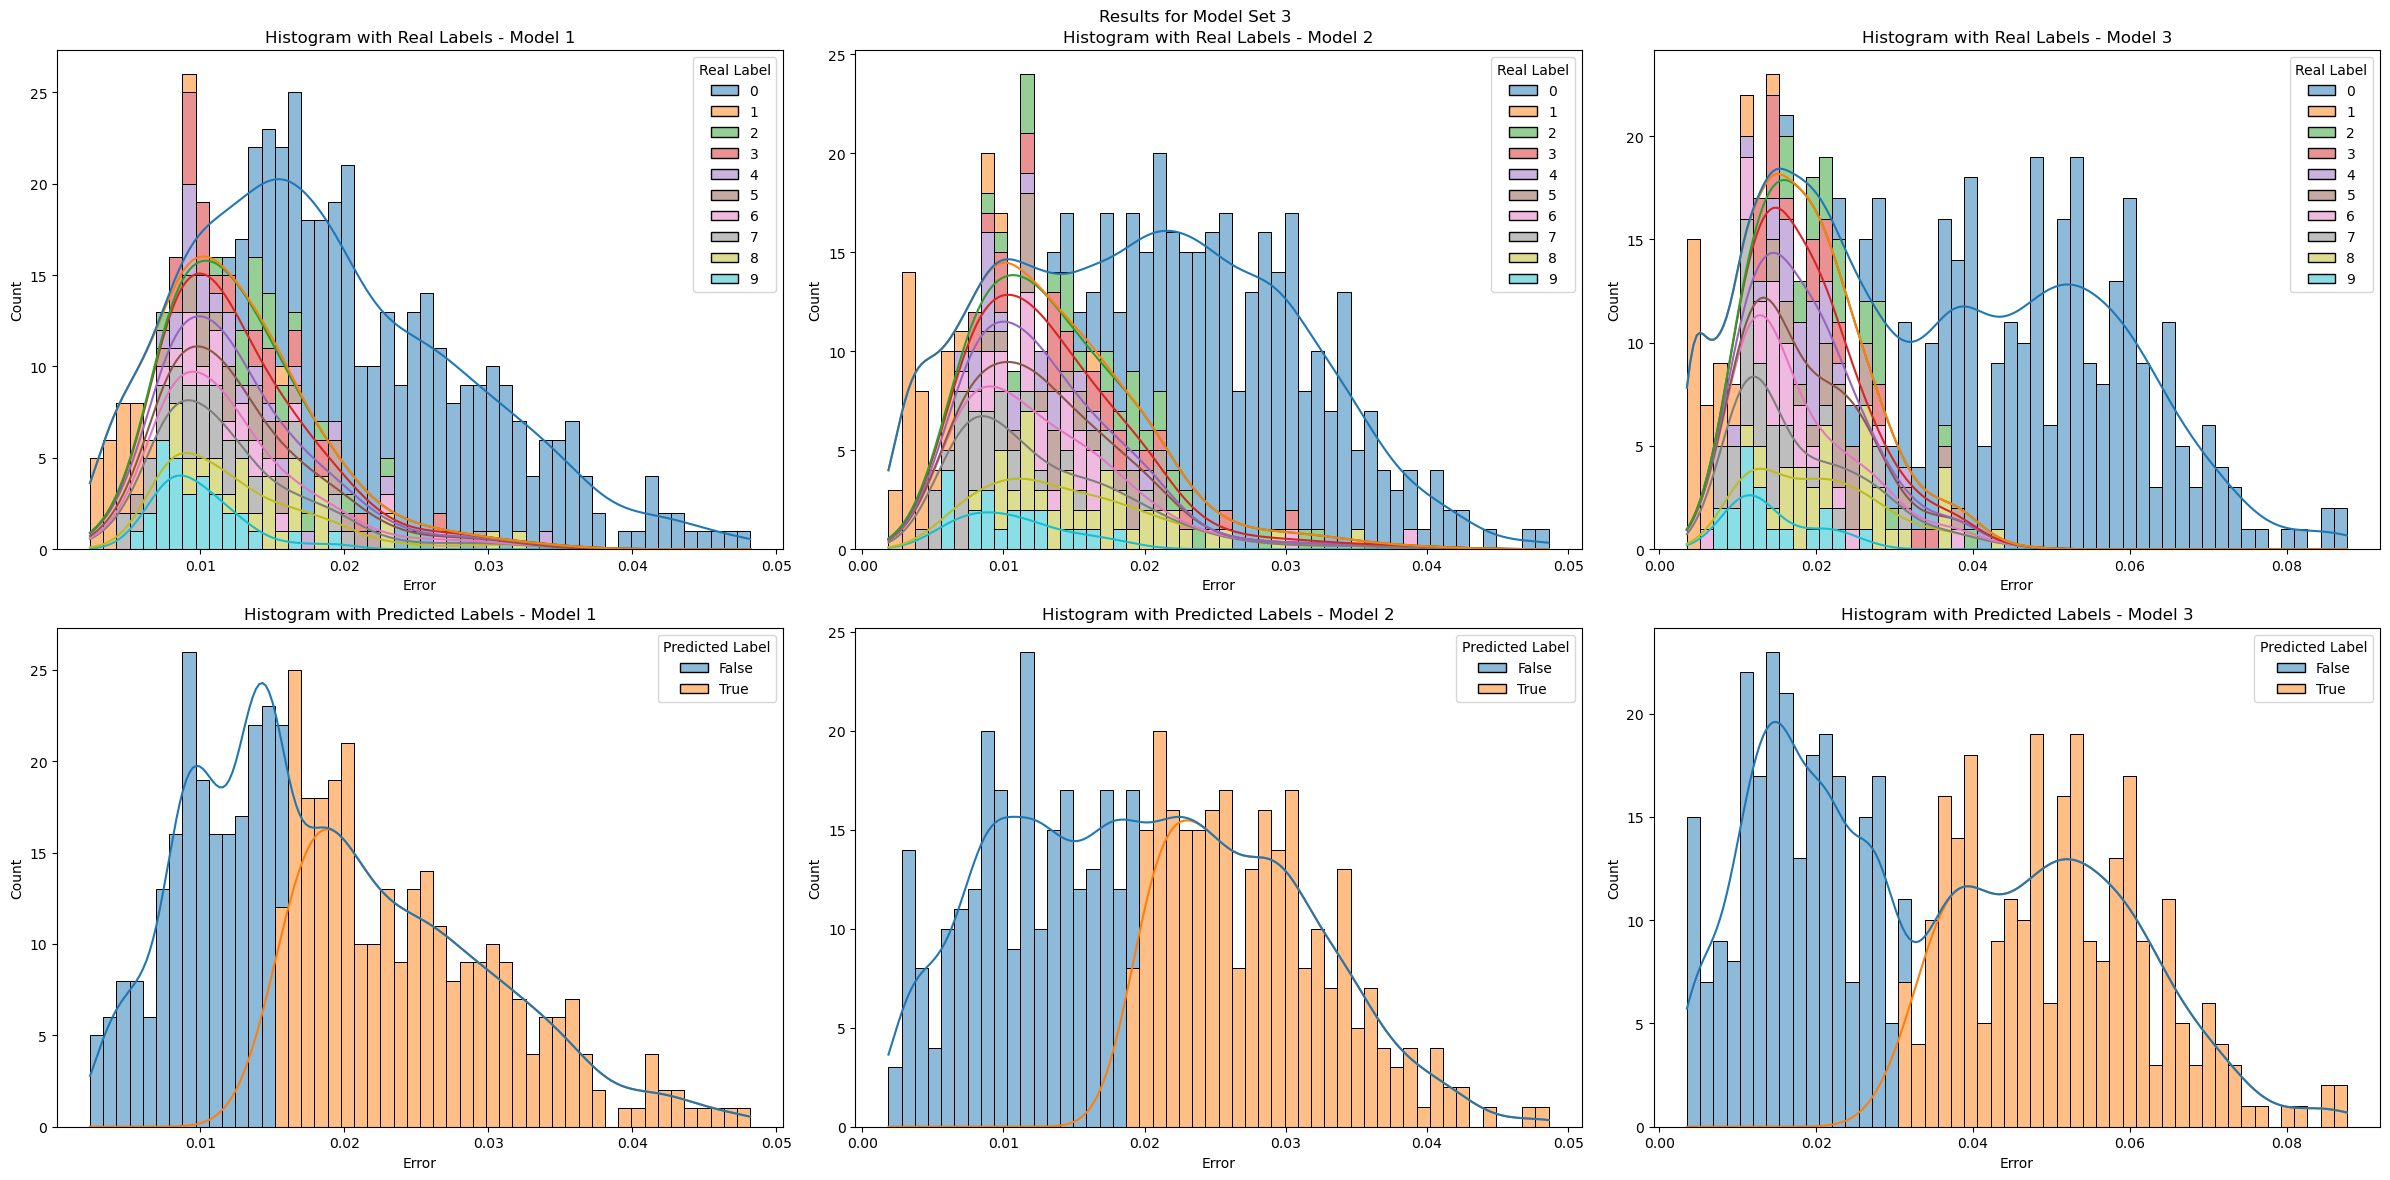

In [38]:
# Create lists to store results for all models
all_errors = []
all_reconstructions = []
all_originals = []
all_labels = []
all_metrics = []

# Iterate through each set of models in ALL_MODELS
for model_set_idx, model_set in enumerate(ALL_MODELS):
    print(f"\nProcessing model set {model_set_idx + 1}/{len(ALL_MODELS)}")
    
    model_errors = []
    model_reconstructions = []
    model_originals = []
    model_labels = []
    model_metrics = []
    
    # Convert and test each model in the set
    for model_idx, model in enumerate(model_set):
        print(f"Processing model {model_idx + 1}/{len(model_set)}")
        
        # Convert ANN to SNN
        snn_model = convert_to_snn(model).to(device)
        
        # Detect anomalies using the SNN
        errors, reconstructions, originals, labels = detect_anomalies_spiking(
            snn_model, val_loader_reduced, device
        )
        
        # Calculate metrics
        best_threshold, best_f1_score, indices, sorted_labels, sorted_errors = check_thresholds(
            errors, labels
        )
        
        # Calculate additional metrics
        sorted_labels_indices = torch.tensor(sorted_labels)
        zeros_indices = sorted_labels_indices == 0
        other_indices = sorted_labels_indices != 0
        
        positive_class = torch.tensor(sorted_errors) >= torch.quantile(torch.tensor(sorted_errors), best_threshold)
        negative_class = torch.tensor(sorted_errors) < torch.quantile(torch.tensor(sorted_errors), best_threshold)
        
        tp = positive_class[zeros_indices].sum()
        fn = negative_class[zeros_indices].sum()
        tn = negative_class[other_indices].sum()
        fp = positive_class[other_indices].sum()
        
        precision = tp/(tp + fp)
        recall = tp/(tp + fn)
        
        # Store results
        model_errors.append(sorted_errors)
        model_reconstructions.append(reconstructions)
        model_originals.append(originals)
        model_labels.append(sorted_labels)
        model_metrics.append({
            'threshold': best_threshold,
            'f1_score': best_f1_score,
            'precision': precision,
            'recall': recall,
            'tp': tp,
            'fn': fn,
            'tn': tn,
            'fp': fp
        })
        
        print(f"Model metrics:")
        print(f"Best Threshold: {best_threshold:.4f}")
        print(f"Precision at Best Threshold: {precision:.4f}")
        print(f"Recall at Best Threshold: {recall:.4f}")
        print(f"F1 Score: {best_f1_score:.4f}")
        
    # Store results for this model set
    all_errors.append(model_errors)
    all_reconstructions.append(model_reconstructions)
    all_originals.append(model_originals)
    all_labels.append(model_labels)
    all_metrics.append(model_metrics)
    
    # Plot results for this model set
    fig, axes = plt.subplots(2, 3, figsize=(24, 12))
    fig.suptitle(f'Results for Model Set {model_set_idx + 1}')
    
    for idx in range(3):
        errors_np = model_errors[idx].cpu()
        labels_np = torch.tensor(model_labels[idx]).cpu()
        predicted_labels_np = (errors_np >= torch.quantile(model_errors[idx], model_metrics[idx]['threshold'])).cpu()
        
        data = {
            'Error': errors_np,
            'Real Label': labels_np,
            'Predicted Label': predicted_labels_np
        }
        df = pd.DataFrame(data)
        
        # Plot histograms
        sns.histplot(data=df, x='Error', hue='Real Label', multiple='stack', 
                    palette='tab10', bins=50, kde=True, ax=axes[0, idx])
        axes[0, idx].set_title(f'Histogram with Real Labels - Model {idx+1}')
        
        sns.histplot(data=df, x='Error', hue='Predicted Label', multiple='stack', 
                    palette='tab10', bins=50, kde=True, ax=axes[1, idx])
        axes[1, idx].set_title(f'Histogram with Predicted Labels - Model {idx+1}')
    
    plt.tight_layout()
    plt.show()

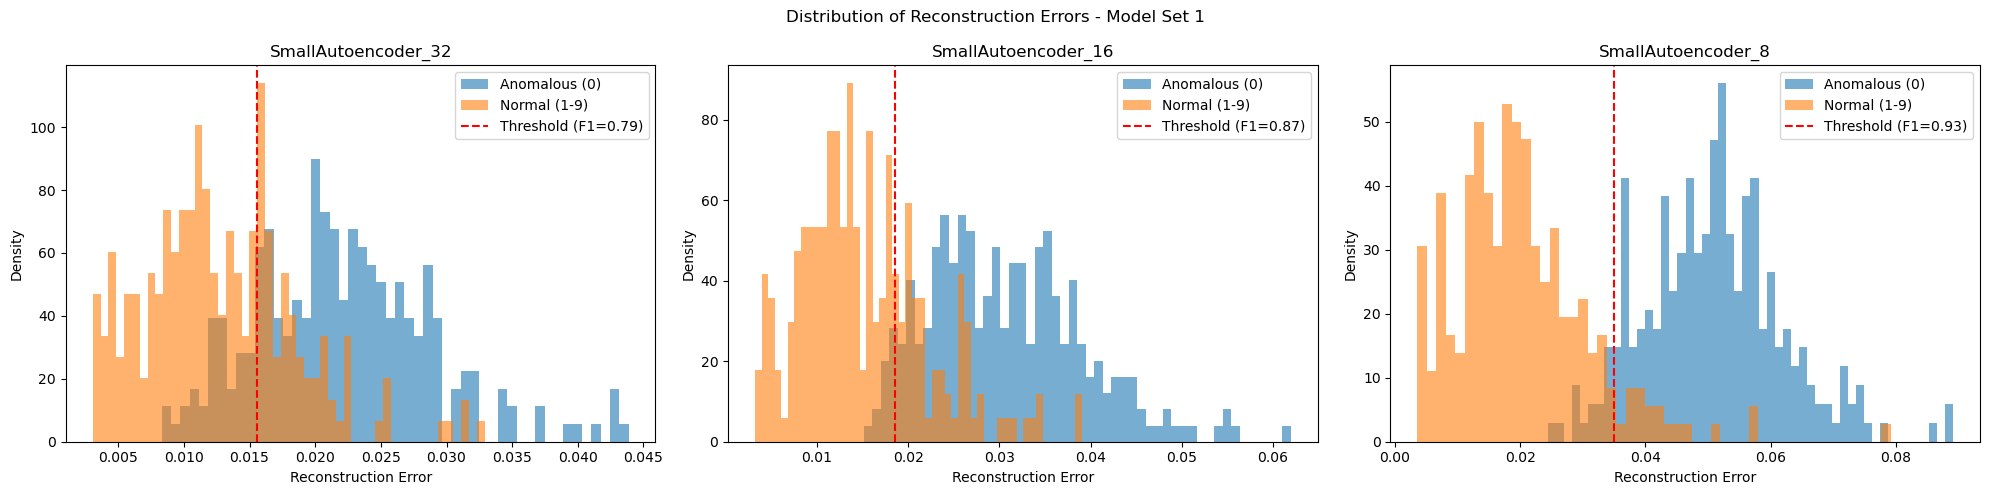

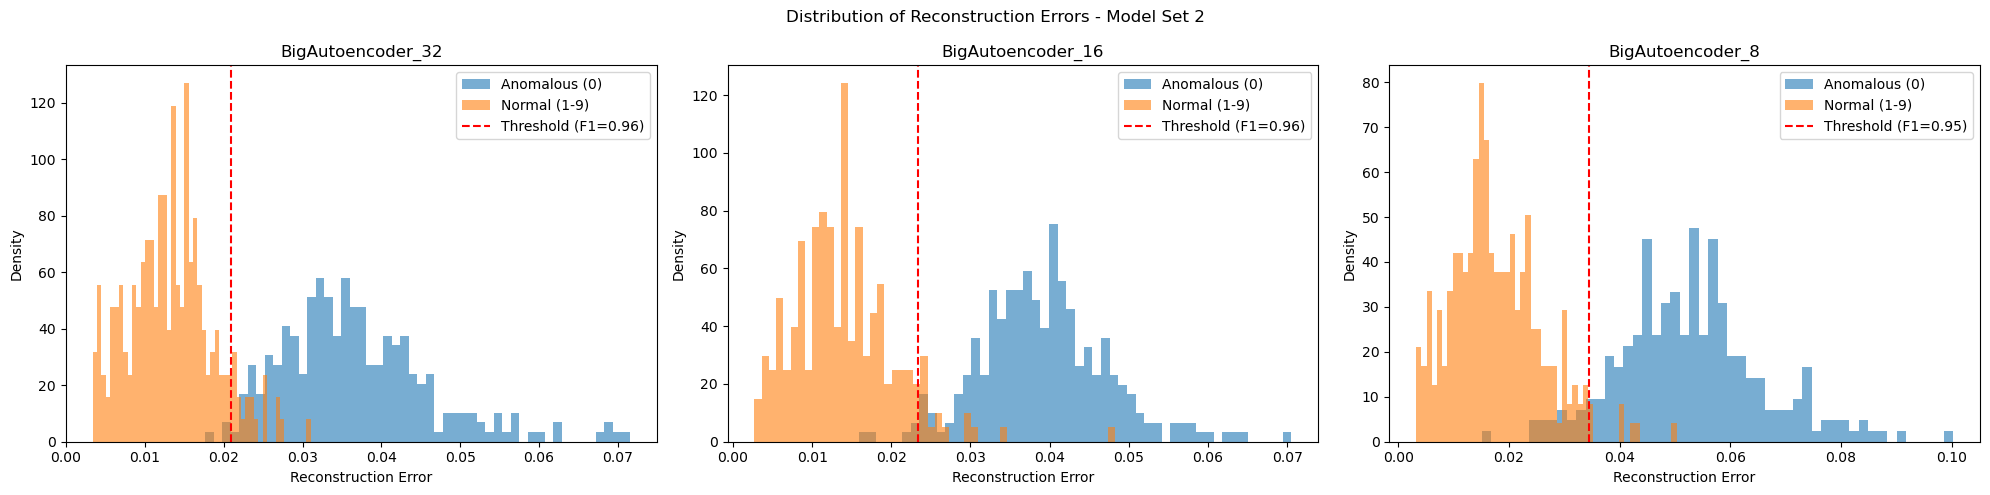

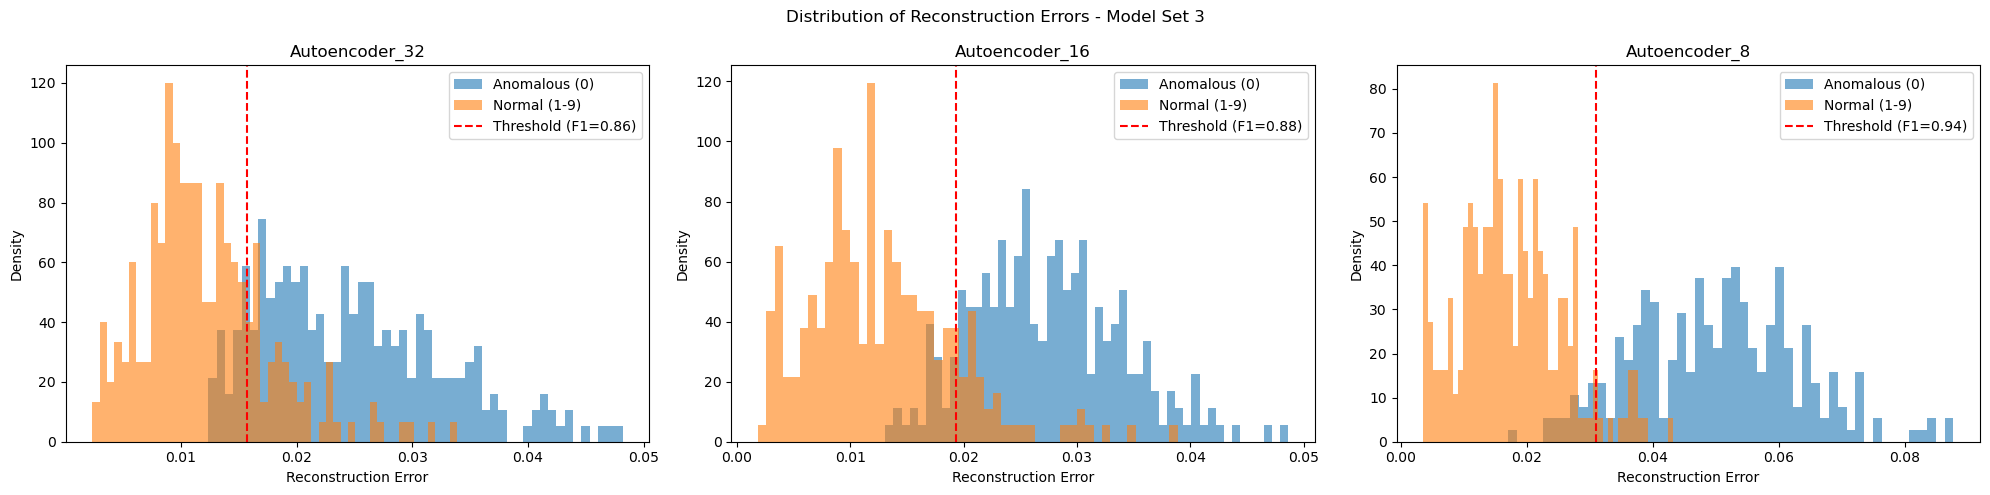

In [39]:
# Create separate plots for each model set
for model_set_idx, model_metrics in enumerate(all_metrics):
    # Get labels for the models in this set
    if model_set_idx == 0:
        model_names = ['SmallAutoencoder_32', 'SmallAutoencoder_16', 'SmallAutoencoder_8']
    elif model_set_idx == 1:
        model_names = ['BigAutoencoder_32', 'BigAutoencoder_16', 'BigAutoencoder_8']
    else:
        model_names = ['Autoencoder_32', 'Autoencoder_16', 'Autoencoder_8']
    
    # Create a figure with subplots for each model in the set
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'Distribution of Reconstruction Errors - Model Set {model_set_idx + 1}')
    
    # Plot distributions for each model in the set
    for idx, metrics in enumerate(model_metrics):
        errors = all_errors[model_set_idx][idx]
        labels = torch.tensor(all_labels[model_set_idx][idx])
        
        # Get anomalous and normal errors
        anomalous_errors = errors[labels == 0]
        normal_errors = errors[labels != 0]
        
        # Plot distributions
        axes[idx].hist(anomalous_errors.cpu(), bins=50, alpha=0.6, 
                      label='Anomalous (0)', density=True)
        axes[idx].hist(normal_errors.cpu(), bins=50, alpha=0.6, 
                      label='Normal (1-9)', density=True)
        axes[idx].axvline(torch.quantile(errors, metrics['threshold']).cpu(), 
                         color='r', linestyle='--', 
                         label=f'Threshold (F1={metrics["f1_score"]:.2f})')
        
        axes[idx].set_xlabel('Reconstruction Error')
        axes[idx].set_ylabel('Density')
        axes[idx].set_title(f'{model_names[idx]}')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

## Temporal Coding

In [44]:
class MNIST_Temporal(datasets.MNIST):
    def __init__(self, root, train=True, download=True, transform=transforms.ToTensor(),
                 time_steps=100, t_max=1.0):
        """
        MNIST dataset with temporal (latency) encoding.
        
        Args:
            root: Root directory of dataset
            train: If True, creates dataset from training set, else from test set
            download: If True, downloads the dataset
            transform: pytorch transforms for preprocessing
            time_steps: Number of time steps for encoding
            t_max: Maximum time value (neurons with 0 intensity will spike at t_max)
        """
        super().__init__(root=root, train=train, download=download, transform=transform)
        self.time_steps = time_steps
        self.t_max = t_max
    
    def __getitem__(self, index):
        """Get temporally encoded sample from dataset"""
        img, target = super().__getitem__(index)
        # Reshape image to 784 pixels (flattened 28x28)
        img_flat = img.view(-1)
        
        # Temporal encoding: Convert pixel intensity to spike timing
        # Higher intensity (closer to 1) = earlier spike (closer to 0)
        # Lower intensity (closer to 0) = later spike (closer to t_max)
        # Pixels with intensity 0 will not spike (set to t_max)
        
        # Create temporal encoding where spike_time = (1-intensity) * t_max
        temporal_code = (1.0 - img_flat) * self.t_max
        
        # Convert continuous time to discrete time steps
        temporal_code = (temporal_code * self.time_steps).long()
        
        # Generate one-hot encoded tensor of size [time_steps, 784]
        spikes = torch.zeros(self.time_steps, 784)
        # For each neuron, set spike to 1 at its specific time step
        for i, t in enumerate(temporal_code):
            if t < self.time_steps:  # Ensure time index is valid
                spikes[t, i] = 1.0
        
        return spikes, target

In [45]:
# Test the temporal encoding class
temporal_mnist_train = MNIST_Temporal("../data", train=True)
temporal_mnist_test = MNIST_Temporal("../data", train=False)

print(f"Training dataset size: {len(temporal_mnist_train)}")
print(f"Test dataset size: {len(temporal_mnist_test)}")

# Create data loaders
temporal_train_loader = DataLoader(temporal_mnist_train, batch_size=64, shuffle=True)
temporal_test_loader = DataLoader(temporal_mnist_test, batch_size=test_batch_size, shuffle=True)

# Get a sample and visualize
sample_spikes, sample_label = next(iter(temporal_test_loader))
print(f"Spike tensor shape: {sample_spikes.shape}")
print(f"Sample label: {sample_label[0]}")

Training dataset size: 60000
Test dataset size: 10000
Spike tensor shape: torch.Size([10, 100, 784])
Sample label: 3


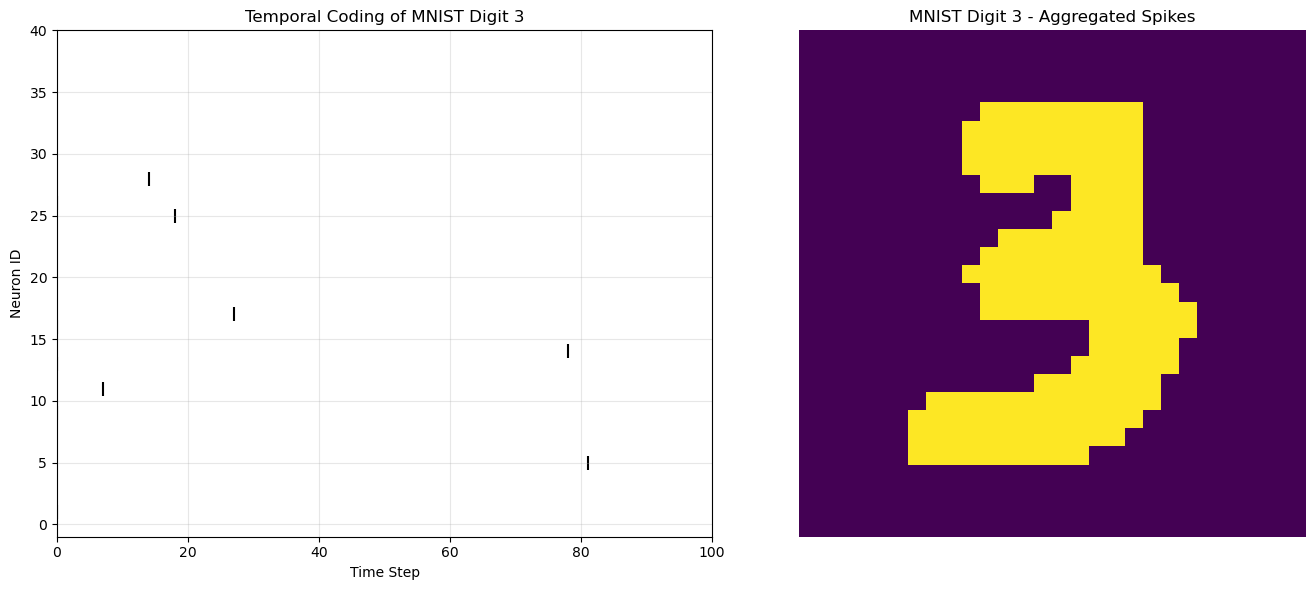

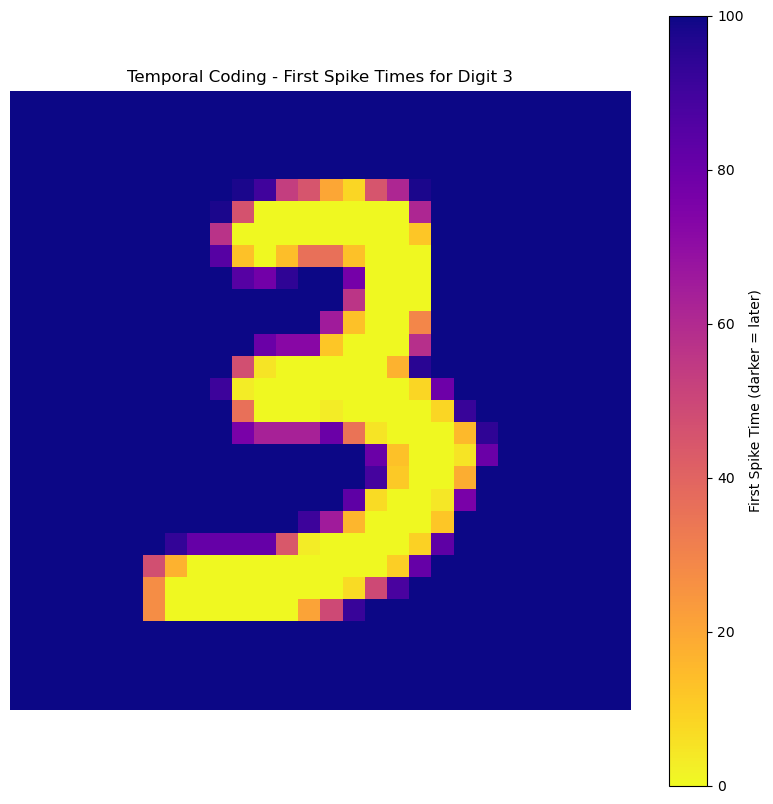

In [48]:
# Visualize the temporal coding
def visualize_temporal_encoding(spike_tensor, label, neuron_indices=None):
  """Visualize temporal encoding for selected neurons"""
  if neuron_indices is None:
    # Choose 40 random neurons to visualize - enough to see a pattern
    neuron_indices = torch.randint(0, 784, (40,))
  
  # Extract the spikes for the selected neurons
  selected_neuron_data = spike_tensor[0, :, neuron_indices].cpu().numpy()
  
  # Create a more informative visualization
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
  
  # Plot 1: Spike raster plot
  for i in range(selected_neuron_data.shape[1]):
    spike_times = np.where(selected_neuron_data[:, i] > 0)[0]
    if len(spike_times) > 0:  # Some neurons might not spike
      ax1.scatter(spike_times, np.ones_like(spike_times) * i, marker='|', s=100, color='black')
  
  ax1.set_title(f"Temporal Coding of MNIST Digit {label[0].item()}")
  ax1.set_xlabel("Time Step")
  ax1.set_ylabel("Neuron ID")
  ax1.set_xlim(0, 100)
  ax1.set_ylim(-1, len(neuron_indices))
  ax1.grid(True, alpha=0.3)
  
  # Plot 2: 2D visualization of the digit
  # Reshape the first image to 28x28
  digit_image = sample_spikes[0, :, :].sum(dim=0).view(28, 28).cpu().numpy()
  ax2.imshow(digit_image, cmap='viridis')
  ax2.set_title(f"MNIST Digit {label[0].item()} - Aggregated Spikes")
  ax2.axis('off')
  
  plt.tight_layout()
  plt.show()
  
  # Also create a heatmap showing when each pixel spikes
  plt.figure(figsize=(10, 10))
  
  # Find the first spike time for each pixel (set to 100 if no spike)
  first_spike_times = np.ones((28, 28)) * 100
  for t in range(100):
    spike_frame = sample_spikes[0, t, :].view(28, 28).cpu().numpy()
    mask = (spike_frame > 0) & (first_spike_times == 100)  # Only update pixels that haven't spiked yet
    first_spike_times[mask] = t
  
  # Plot the first spike times
  plt.imshow(first_spike_times, cmap='plasma_r')  # Reverse colormap so early spikes are bright
  plt.colorbar(label='First Spike Time (darker = later)')
  plt.title(f"Temporal Coding - First Spike Times for Digit {label[0].item()}")
  plt.axis('off')
  plt.show()

# Visualize a sample
visualize_temporal_encoding(sample_spikes, sample_label)

In [47]:
# Compare ANN and SNN with temporal coding
def detect_anomalies_temporal(snn_model, val_loader_reduced, device, num_examples=500):
    """Detect anomalies using the SNN with temporal coding"""
    reconstructions = []
    originals = []
    labels = []
    errors = []
    
    # Create temporal encoder
    temp_encoder = MNIST_Temporal("../data", train=False)
    
    with torch.no_grad():
        for data, label in val_loader_reduced:
            if len(originals) >= num_examples:
                break
            
            for example, l in zip(data, label):
                if len(originals) >= num_examples:
                    break
                
                # Create temporal encoding
                example = example.to(device)
                
                # Convert to image format for temporal encoding
                img = example.view(1, 784)
                temporal_code = (1.0 - img) * 1.0  # t_max = 1.0
                temporal_code = (temporal_code * 100).long()  # time_steps = 100
                
                # Generate spike tensor
                spikes = torch.zeros(100, 784, device=device)
                for i, t in enumerate(temporal_code[0]):
                    if t < 100:  # Valid time step
                        spikes[t, i] = 1.0
                
                # Pass through SNN
                output_spikes = snn_model.spiking_model(spikes)
                
                # Average spikes to get reconstruction
                # We use a weighted average where earlier spikes have more influence
                timesteps = torch.arange(100, device=device, dtype=torch.float32).view(-1, 1)
                weighted_output = output_spikes * (1.0 - timesteps/100)
                reconstruction = weighted_output.sum(dim=0) / (weighted_output > 0).sum(dim=0).clamp(min=1.0)
                
                # Calculate reconstruction error
                error = torch.mean((reconstruction - example) ** 2)
                
                # Store results
                reconstructions.append(reconstruction.cpu())
                originals.append(example.cpu())
                labels.append(l.cpu())
                errors.append(error.cpu())
    
    return errors, reconstructions, originals, labels

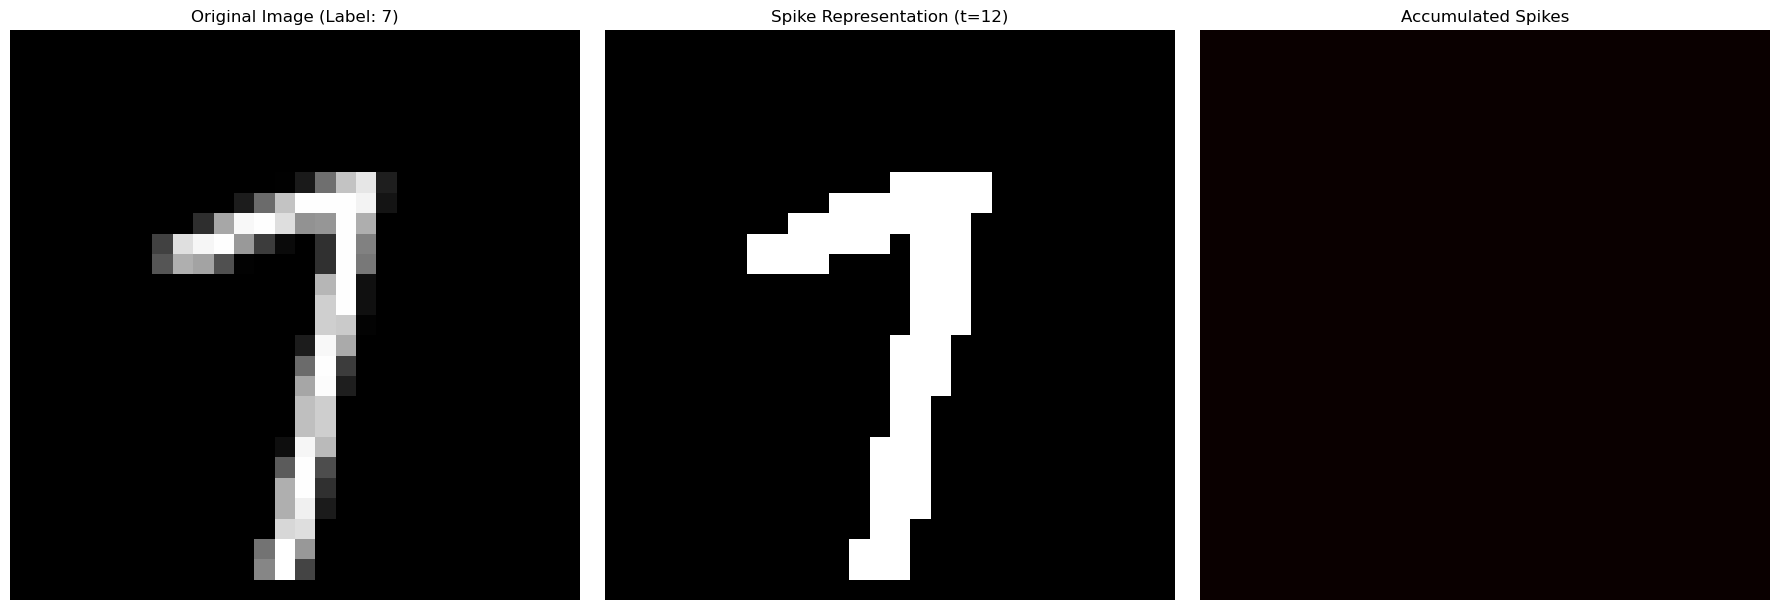